In [27]:
#import pandas as pd

In [28]:
#df = pd.read_csv('tumor_details.csv')

In [29]:
#print(df.head())

In [30]:
#df['initial_kps'].mean()

In [31]:
#df.columns.tolist()

In [32]:
#df.isnull().sum()

In [33]:
#df.

In [34]:
#for col in df.columns:
    #print(f"{col}: {df[col].unique()}")

In [35]:
#bam = pd.read_csv('bam.csv')

In [36]:
#bam

In [37]:
#bam.columns.tolist()

In [38]:
#for col in bam.columns:
    #print(f"{col}: {bam[col].unique()}")

In [39]:
#raw_fpkm = pd.read_csv('raw_fpkm.csv')

In [40]:
#raw_fpkm

In [41]:
#raw_fpkm.columns.tolist()

In [42]:
#for col in raw_fpkm.columns:
    #print(f"{col}: {raw_fpkm[col].unique()}")

In [43]:
#Aging, Dementia, TBI atlas
#fpkm_normalized = pd.read_csv('gene expression matrix 2016-03-03/fpkm_table_normalized.csv')

In [44]:
#fpkm_normalized

In [45]:
#Aging, Dementia, TBI atlas
#rows_genes = pd.read_csv('gene expression matrix 2016-03-03/rows-genes.csv')

In [46]:
#rows_genes

In [47]:
#gpr_genes = rows_genes[rows_genes['gene_symbol'].str.startswith('GPR')]
#print(gpr_genes)

In [48]:
#gpr_genes.columns.tolist()

In [49]:
#for col in gpr_genes.columns:
    #print(f"{col}: {gpr_genes[col].unique()}")

In [50]:
#Allen Brain Atlas Glioblastoma data
#gbm_columns_samples = pd.read_csv('gene expression matrix 2014-11-25/columns-samples.csv')
#gbm_fpkm = pd.read_csv('gene expression matrix 2014-11-25/fpkm_table.csv')
#gbm_rows_genes = pd.read_csv('gene expression matrix 2014-11-25/rows-genes.csv')

In [51]:
#gbm_fpkm

In [52]:
#gbm_rows_genes

In [53]:
#gbm_columns_samples

In [72]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, spearmanr, shapiro, ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

# AI told me to set plotting style for publication-quality figures
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

In [73]:
# Immune related GPCRs expected to be enriched in GBM
chemokine_receptors = [
    'CCR1', 'CCR2', 'CCR3', 'CCR4', 'CCR5', 'CCR6', 'CCR7', 'CCR8', 'CCR9', 'CCR10',
    'CXCR1', 'CXCR2', 'CXCR3', 'CXCR4', 'CXCR5', 'CXCR6',
    'XCR1', 'CX3CR1'
]

complement_receptors = ['C3AR1', 'C5AR1', 'C5AR2']

# NT GPCRs expected to be altered in AD
serotonin_receptors = [
    'HTR1A', 'HTR1B', 'HTR1D', 'HTR1E', 'HTR1F',
    'HTR2A', 'HTR2B', 'HTR2C',
    'HTR4', 'HTR5A', 'HTR6', 'HTR7'
]

dopamine_receptors = ['DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5']

glutamate_receptors = ['GRM1', 'GRM2', 'GRM3', 'GRM4', 'GRM5', 'GRM6', 'GRM7', 'GRM8']

adrenergic_receptors = [
    'ADRA1A', 'ADRA1B', 'ADRA1D',
    'ADRA2A', 'ADRA2B', 'ADRA2C',
    'ADRB1', 'ADRB2', 'ADRB3'
]

# Other GPCRs
adenosine_receptors = ['ADORA1', 'ADORA2A', 'ADORA2B', 'ADORA3']

purinergic_receptors = [
    'P2RY1', 'P2RY2', 'P2RY4', 'P2RY6', 'P2RY11', 'P2RY12', 'P2RY13', 'P2RY14'
]

cannabinoid_receptors = ['CNR1', 'CNR2']

opioid_receptors = ['OPRM1', 'OPRD1', 'OPRK1', 'OPRL1']

# GPR Orphan receptors
gpr_genes = [
    'GPR3', 'GPR4', 'GPR6', 'GPR12', 'GPR15', 'GPR17', 'GPR18', 'GPR19',
    'GPR20', 'GPR21', 'GPR35', 'GPR37', 'GPR55', 'GPR68', 'GPR84', 'GPR88',
    'GPR132', 'GPR183'
]

# Combining all gpcrs into 1 list
all_gpcrs = list(set(
    chemokine_receptors + 
    complement_receptors + 
    serotonin_receptors + 
    dopamine_receptors + 
    glutamate_receptors + 
    adrenergic_receptors +
    adenosine_receptors + 
    purinergic_receptors + 
    cannabinoid_receptors + 
    opioid_receptors +
    gpr_genes
))

# Create dictionary to track GPCR families
gpcr_families = {}
for g in chemokine_receptors: gpcr_families[g] = 'Chemokine'
for g in complement_receptors: gpcr_families[g] = 'Complement'
for g in serotonin_receptors: gpcr_families[g] = 'Serotonin'
for g in dopamine_receptors: gpcr_families[g] = 'Dopamine'
for g in glutamate_receptors: gpcr_families[g] = 'Glutamate'
for g in adrenergic_receptors: gpcr_families[g] = 'Adrenergic'
for g in adenosine_receptors: gpcr_families[g] = 'Adenosine'
for g in purinergic_receptors: gpcr_families[g] = 'Purinergic'
for g in cannabinoid_receptors: gpcr_families[g] = 'Cannabinoid'
for g in opioid_receptors: gpcr_families[g] = 'Opioid'
for g in gpr_genes: gpcr_families[g] = 'Orphan GPR'

print(f"\nTotal GPCRs: {len(all_gpcrs)}")
print(f"\nBreakdown by family:")
print(f"  Chemokine receptors: {len(chemokine_receptors)}")
print(f"  Serotonin receptors: {len(serotonin_receptors)}")
print(f"  Dopamine receptors: {len(dopamine_receptors)}")
print(f"  Glutamate receptors: {len(glutamate_receptors)}")
print(f"  Orphan GPR genes: {len(gpr_genes)}")
print(f"  Other families: {len(all_gpcrs) - len(chemokine_receptors) - len(serotonin_receptors) - len(dopamine_receptors) - len(glutamate_receptors) - len(gpr_genes)}")


Total GPCRs: 91

Breakdown by family:
  Chemokine receptors: 18
  Serotonin receptors: 12
  Dopamine receptors: 5
  Glutamate receptors: 8
  Orphan GPR genes: 18
  Other families: 30


In [74]:
# DATASET 1: Clinical information (donor_id, tumor_name, survival_days, etc.)
print("GBM Dataset 1: Clinical Information")
gbm_clinical = pd.read_csv('tumor_details.csv')

print(f"\nShape: {gbm_clinical.shape}")
print(f"\nColumns available:")
print(gbm_clinical.columns.tolist())
print(f"\nFirst few rows:")
print(gbm_clinical.head())

# Identify key columns for merging
print(f"\nKey identifiers in Dataset 1:")
if 'donor_id' in gbm_clinical.columns:
    print(f"  - donor_id: {gbm_clinical['donor_id'].nunique()} unique donors")
if 'tumor_name' in gbm_clinical.columns:
    print(f"  - tumor_name: {gbm_clinical['tumor_name'].nunique()} unique tumors")

GBM Dataset 1: Clinical Information

Shape: (42, 10)

Columns available:
['donor_id', 'tumor_name', 'molecular_subtype', 'extent_of_resection', 'surgery', 'mgmt_methylation', 'survival_days', 'egfr_amplification', 'initial_kps', 'age_in_years']

First few rows:
   donor_id tumor_name       molecular_subtype extent_of_resection  surgery  \
0     12111    W10-1-1               Proneural            Complete  primary   
1     12112    W11-1-1  Classical, Mesenchymal            Complete  primary   
2     10865     W1-1-2               Classical            Complete  primary   
3     12165    W12-1-1               Classical           Sub-total  primary   
4     12877    W13-1-1             Mesenchymal            Complete  primary   

  mgmt_methylation  survival_days egfr_amplification  initial_kps age_in_years  
0              Yes            NaN                 No          100       44 yrs  
1              Yes         1076.0                 No          100       57 yrs  
2               No  

In [75]:
# DATASET 2: RNA-seq quality metrics (tumor_id, RIN, read counts, etc.)
print("GBM Dataset 2: RNA-seq Metrics (BAM file)")
gbm_rna_metrics = pd.read_csv('bam.csv')

print(f"\nShape: {gbm_rna_metrics.shape}")
print(f"\nColumns available:")
print(gbm_rna_metrics.columns.tolist())
print(f"\nFirst few rows:")
print(gbm_rna_metrics.head())

# Check for QC-relevant columns
qc_columns = ['rna_integrity_number', 'rnaseq_total_reads', 'rnaseq_percent_reads_aligned_to_mrna']
print(f"\nQC columns present:")
for col in qc_columns:
    if col in gbm_rna_metrics.columns:
        print(f"  Yes {col}")
    else:
        print(f"  No {col} - NOT FOUND")

GBM Dataset 2: RNA-seq Metrics (BAM file)

Shape: (270, 16)

Columns available:
['tumor_id', 'tumor_name', 'block_name', 'specimen_name', 'rna_well', 'rna_integrity_number', 'structure_id', 'structure_acronym', 'structure_name', 'rnaseq_total_reads', 'rnaseq_percent_reads_aligned_to_mrna', 'rnaseq_percent_reads_aligned_to_ncrna', 'rnaseq_percent_reads_aligned_to_genome_only', 'files_contents', 'bam_download_link', 'bai_download_link']

First few rows:
   tumor_id tumor_name   block_name   specimen_name   rna_well  \
0    705803     W9-1-1   W9-1-1-J.2   W9-1-1-J.2.01  302262298   
1    709556    W16-1-1    W16-1-1-B    W16-1-1-B.03  303748332   
2    705859    W11-1-1  W11-1-1-C.1  W11-1-1-C.1.01  301287615   
3    703393     W1-1-2   W1-1-2-E.1   W1-1-2-E.1.03  304950326   
4    703393     W1-1-2   W1-1-2-H.2   W1-1-2-H.2.01  300173638   

   rna_integrity_number  structure_id          structure_acronym  \
0                   7.4     309780846  CTpan-reference-histology   
1          

In [76]:
# DATASET 3: Additional RNA-seq info
print("GBM Dataset 3: Additional RNA-seq info")
gbm_fpkm = pd.read_csv('gene expression matrix 2014-11-25/fpkm_table.csv')
print(f"\nShape: {gbm_fpkm.shape}")
print(f"\nColumns available:")
print(gbm_fpkm.columns.tolist())
print(f"\nFirst few rows:")
print(gbm_fpkm.head())

GBM Dataset 3: Additional RNA-seq info

Shape: (25873, 271)

Columns available:
['gene_id\\rna_well_id', '305273026', '305405294', '305952560', '306124462', '300173630', '300173636', '300629315', '300629344', '300629350', '300629358', '300629403', '300629424', '300629432', '301287570', '301287582', '302262300', '301287613', '301287630', '301287636', '301626681', '301626685', '301626689', '301626693', '301287698', '301287708', '301626597', '301626605', '302264000', '304950286', '304950292', '304357555', '303748303', '303748309', '303748328', '303748260', '303748330', '303748264', '303748334', '303748338', '304950300', '303748342', '304357561', '304357565', '304357518', '304950326', '304950249', '304950261', '304357589', '304357591', '304357595', '304357599', '304357603', '304477573', '304477577', '304477581', '304703655', '304950370', '304950374', '304950405', '304950409', '305272792', '305272798', '305272994', '305273000', '305273032', '305273040', '305461070', '305461076', '305461082'

In [77]:
# GBM Gene Expression Matrix (already processed)
print("GBM Gene Expression Data")
gbm_fpkm = pd.read_csv('gene expression matrix 2014-11-25/fpkm_table.csv')
gbm_genes = pd.read_csv('gene expression matrix 2014-11-25/rows-genes.csv')
gbm_samples = pd.read_csv('columns-samples.csv')

print(f"\nExpression matrix shape: {gbm_fpkm.shape}")
print(f"Number of genes: {len(gbm_genes)}")
print(f"Number of samples: {len(gbm_samples)}")
print(f"\nGene info columns: {gbm_genes.columns.tolist()}")
print(f"Sample info columns: {gbm_samples.columns.tolist()}")

GBM Gene Expression Data

Expression matrix shape: (25873, 271)
Number of genes: 25873
Number of samples: 270

Gene info columns: ['gene_id', 'chromosome', 'gene_entrez_id', 'gene_symbol', 'gene_name']
Sample info columns: ['tumor_id', 'tumor_name', 'block_id', 'block_name', 'specimen_id', 'specimen_name', 'rna_well_id', 'polygon_id', 'structure_id', 'structure_abbreviation', 'structure_color', 'structure_name']


In [78]:
# AD Gene Expression Matrix (already normalized)
print("Alzheimer's Disease Data")
ad_fpkm = pd.read_csv('gene expression matrix 2016-03-03/fpkm_table_normalized.csv')
ad_genes = pd.read_csv('gene expression matrix 2016-03-03/rows-genes.csv')

print(f"\nExpression matrix shape: {ad_fpkm.shape}")
print(f"Number of genes: {len(ad_genes)}")
print(f"\nGene info columns: {ad_genes.columns.tolist()}")

#sample/donor metadata
ad_samples = pd.read_csv('gene expression matrix 2016-03-03/columns-samples.csv')
print(f"Sample info columns: {ad_samples.columns.tolist()}")

Alzheimer's Disease Data

Expression matrix shape: (50281, 378)
Number of genes: 50281

Gene info columns: ['gene_id', 'chromosome', 'gene_entrez_id', 'gene_symbol', 'gene_name']
Sample info columns: ['rnaseq_profile_id', 'donor_id', 'donor_name', 'specimen_id', 'specimen_name', 'rna_well_id', 'polygon_id', 'structure_id', 'structure_acronym', 'structure_color', 'structure_name', 'hemisphere']


In [79]:
# Step 1: Identify the merge keys
# Check what ID columns exist in each dataset
print("Dataset 1 (Clinical) ID columns:")
id_cols_d1 = [col for col in gbm_clinical.columns if 'id' in col.lower() or 'name' in col.lower()]
print(id_cols_d1)

print("\nDataset 2 (RNA metrics) ID columns:")
id_cols_d2 = [col for col in gbm_rna_metrics.columns if 'id' in col.lower() or 'name' in col.lower()]
print(id_cols_d2)

print("\nSample metadata ID columns:")
id_cols_samples = [col for col in gbm_samples.columns if 'id' in col.lower() or 'name' in col.lower()]
print(id_cols_samples)

Dataset 1 (Clinical) ID columns:
['donor_id', 'tumor_name']

Dataset 2 (RNA metrics) ID columns:
['tumor_id', 'tumor_name', 'block_name', 'specimen_name', 'structure_id', 'structure_name']

Sample metadata ID columns:
['tumor_id', 'tumor_name', 'block_id', 'block_name', 'specimen_id', 'specimen_name', 'rna_well_id', 'polygon_id', 'structure_id', 'structure_name']


In [80]:
# Step 2: Merge datasets
gbm_merged = pd.merge(gbm_samples, gbm_clinical, on='tumor_name', how='left')  # or 'structure_id'?
gbm_merged = pd.merge(gbm_merged, gbm_rna_metrics, on='tumor_id', how='left') 

In [81]:
# Step 3: Annotate samples with disease type GBM or AD
#GBM
gbm_metadata = gbm_samples.copy()
gbm_metadata['disease'] = 'Glioblastoma'

print(f"\nGBM metadata shape: {gbm_metadata.shape}")
print(f"Columns: {gbm_metadata.columns.tolist()}")

#AD
ad_metadata = ad_samples.copy()
ad_metadata['disease'] = 'Alzheimer'

print(f"\nAD metadata shape: {ad_metadata.shape}")
print(f"Columns: {ad_metadata.columns.tolist()}")


GBM metadata shape: (270, 13)
Columns: ['tumor_id', 'tumor_name', 'block_id', 'block_name', 'specimen_id', 'specimen_name', 'rna_well_id', 'polygon_id', 'structure_id', 'structure_abbreviation', 'structure_color', 'structure_name', 'disease']

AD metadata shape: (377, 13)
Columns: ['rnaseq_profile_id', 'donor_id', 'donor_name', 'specimen_id', 'specimen_name', 'rna_well_id', 'polygon_id', 'structure_id', 'structure_acronym', 'structure_color', 'structure_name', 'hemisphere', 'disease']



RNA Integrity Number (RIN) Statistics:
  Total samples with RIN: 258
  Mean RIN: 7.13
  Median RIN: 7.30
  Min RIN: 3.60
  Max RIN: 9.00

  Samples passing RIN >= 7: 163 (63.2%)
  Samples failing RIN < 7: 95 (36.8%)


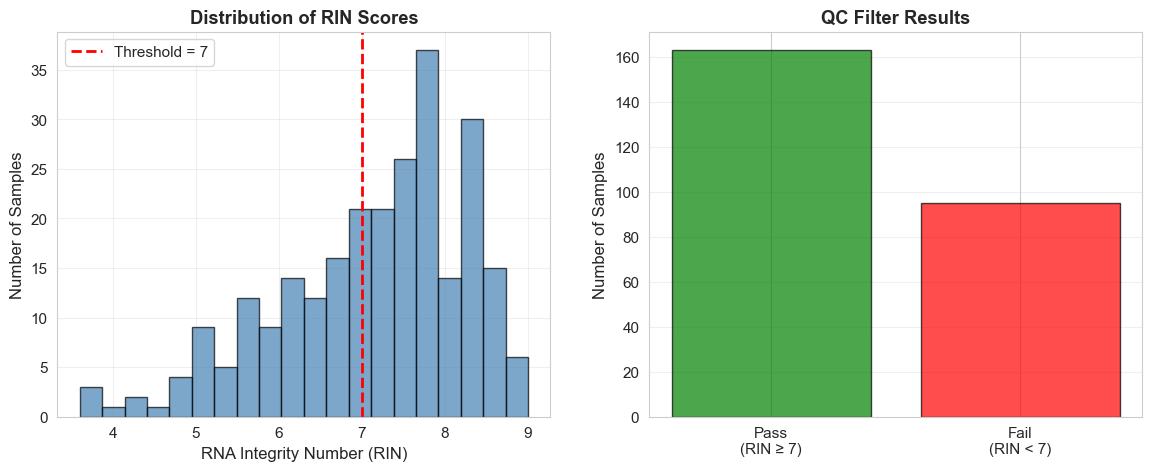

In [82]:
# QC Step 1: Check RNA Integrity Number (RIN)

rin_data = gbm_rna_metrics['rna_integrity_number'].dropna()
print(f"\nRNA Integrity Number (RIN) Statistics:")
print(f"  Total samples with RIN: {len(rin_data)}")
print(f"  Mean RIN: {rin_data.mean():.2f}")
print(f"  Median RIN: {rin_data.median():.2f}")
print(f"  Min RIN: {rin_data.min():.2f}")
print(f"  Max RIN: {rin_data.max():.2f}")
    
# Apply threshold
rin_threshold = 7
samples_pass_rin = (rin_data >= rin_threshold).sum()
samples_fail_rin = (rin_data < rin_threshold).sum()
    
print(f"\n  Samples passing RIN >= {rin_threshold}: {samples_pass_rin} ({samples_pass_rin/len(rin_data)*100:.1f}%)")
print(f"  Samples failing RIN < {rin_threshold}: {samples_fail_rin} ({samples_fail_rin/len(rin_data)*100:.1f}%)")
    
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(rin_data, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(rin_threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {rin_threshold}')
axes[0].set_xlabel('RNA Integrity Number (RIN)', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Distribution of RIN Scores', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
    
axes[1].bar(['Pass\n(RIN ≥ 7)', 'Fail\n(RIN < 7)'], [samples_pass_rin, samples_fail_rin], color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('QC Filter Results', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
    
plt.show()

In [83]:
# QC Step 2: Check read counts and alignment percentages

print("\nRNA-seq Read Count Statistics:")
read_counts = gbm_rna_metrics['rnaseq_total_reads'].dropna()
print(f"  Mean total reads: {read_counts.mean():,.0f}")
print(f"  Median total reads: {read_counts.median():,.0f}")
print(f"  Min total reads: {read_counts.min():,.0f}")
print(f"  Max total reads: {read_counts.max():,.0f}")

print("\nmRNA Alignment Statistics:")
alignment = gbm_rna_metrics['rnaseq_percent_reads_aligned_to_mrna'].dropna()
print(f"  Mean % aligned to mRNA: {alignment.mean():.1f}%")
print(f"  Median % aligned to mRNA: {alignment.median():.1f}%")
print(f"  Min % aligned to mRNA: {alignment.min():.1f}%")
print(f"  Max % aligned to mRNA: {alignment.max():.1f}%")


RNA-seq Read Count Statistics:
  Mean total reads: 35,146,707
  Median total reads: 33,411,669
  Min total reads: 9,829,243
  Max total reads: 150,821,378

mRNA Alignment Statistics:
  Mean % aligned to mRNA: 38.8%
  Median % aligned to mRNA: 39.0%
  Min % aligned to mRNA: 15.0%
  Max % aligned to mRNA: 57.2%


In [84]:
# First approach (GPR genes only)
print("First approach: Genes starting with 'GPR' only")


# GBM
print("\nGBM Dataset:")
gbm_all_genes = gbm_genes['gene_symbol'].tolist()
print(f"  Total genes in dataset: {len(gbm_all_genes)}")

gbm_gpr_genes = [g for g in gbm_all_genes if g.startswith('GPR')]
print(f"  Genes starting with 'GPR': {len(gbm_gpr_genes)}")
print(f"  Examples: {gbm_gpr_genes[:10]}")

# AD
print("\nAlzheimer's Dataset:")
ad_all_genes = ad_genes['gene_symbol'].tolist()
print(f"  Total genes in dataset: {len(ad_all_genes)}")

ad_gpr_genes = [g for g in ad_all_genes if g.startswith('GPR')]
print(f"  Genes starting with 'GPR': {len(ad_gpr_genes)}")
print(f"  Examples: {ad_gpr_genes[:10]}")

First approach: Genes starting with 'GPR' only

GBM Dataset:
  Total genes in dataset: 25873
  Genes starting with 'GPR': 109
  Examples: ['GPR183', 'GPR1', 'GPR3', 'GPR4', 'GPR6', 'GPR12', 'GPR15', 'GPR17', 'GPR18', 'GPR19']

Alzheimer's Dataset:
  Total genes in dataset: 50281
  Genes starting with 'GPR': 98
  Examples: ['GPR153', 'GPR157', 'GPR3', 'GPR88', 'GPR61', 'GPR89A', 'GPR89B', 'GPR161', 'GPR52', 'GPR25']


In [85]:
# Second more comprehensive GPCR approach
print("Second Comprehensive approach: All GPCRs from classification")

# Get unique genes from each dataset
gbm_unique_genes = list(set(gbm_all_genes))
ad_unique_genes = list(set(ad_all_genes))

# Filter for GPCRs present in each dataset
gbm_gpcr_genes_full = [g for g in all_gpcrs if g in gbm_unique_genes]
ad_gpcr_genes_full = [g for g in all_gpcrs if g in ad_unique_genes]

print(f"\nGBM: {len(gbm_gpcr_genes_full)} GPCRs found (out of {len(all_gpcrs)} total)")
print(f"AD: {len(ad_gpcr_genes_full)} GPCRs found (out of {len(all_gpcrs)} total)")

# Find common GPCRs
common_gpcrs = sorted(list(set(gbm_gpcr_genes_full) & set(ad_gpcr_genes_full)))
print(f"\nCommon GPCRs in both datasets: {len(common_gpcrs)}")

# Show the difference in each approach
print("Comparing both approaches")
common_gpr_only = set([g for g in common_gpcrs if g.startswith('GPR')])
print(f"Common GPCRs starting with 'GPR': {len(common_gpr_only)}")
print(f"Total common GPCRs: {len(common_gpcrs)}")
print(f"\nWe would have MISSED {len(common_gpcrs) - len(common_gpr_only)} important receptors!")

# Check key receptors
print("Key receptors check:")

key_gbm_receptors = ['CXCR4', 'CCR2', 'CCR5', 'C3AR1', 'C5AR1']
key_ad_receptors = ['HTR2A', 'HTR1A', 'DRD2', 'DRD1', 'GRM5']

print("\nExpected GBM receptors (immune-related):")
for r in key_gbm_receptors:
    status = "FOUND" if r in common_gpcrs else "✗ NOT FOUND"
    print(f"  {r}: {status}")

print("\nExpected AD receptors (neurotransmitter-related):")
for r in key_ad_receptors:
    status = "FOUND" if r in common_gpcrs else "✗ NOT FOUND"
    print(f"  {r}: {status}")

print("\n Using second GPCR list for analysis, not first GPCR list.")

Second Comprehensive approach: All GPCRs from classification

GBM: 90 GPCRs found (out of 91 total)
AD: 91 GPCRs found (out of 91 total)

Common GPCRs in both datasets: 90
Comparing both approaches
Common GPCRs starting with 'GPR': 18
Total common GPCRs: 90

We would have MISSED 72 important receptors!
Key receptors check:

Expected GBM receptors (immune-related):
  CXCR4: FOUND
  CCR2: FOUND
  CCR5: FOUND
  C3AR1: FOUND
  C5AR1: FOUND

Expected AD receptors (neurotransmitter-related):
  HTR2A: FOUND
  HTR1A: FOUND
  DRD2: FOUND
  DRD1: FOUND
  GRM5: FOUND

 Using second GPCR list for analysis, not first GPCR list.


In [86]:
#Expression Matrix
# The FPKM tables are typically in format where:
# - Rows correspond to genes (row index matches rows-genes.csv)
# - Columns correspond to samples (column names match columns-samples.csv)

# Step 1: Add gene symbols to FPKM table
gbm_fpkm_with_genes = gbm_fpkm.copy()
gbm_fpkm_with_genes['gene_symbol'] = gbm_genes['gene_symbol'].values

# Step 2: Filter for common GPCRs
gbm_gpcr_fpkm = gbm_fpkm_with_genes[gbm_fpkm_with_genes['gene_symbol'].isin(common_gpcrs)]

# Step 3: Set gene_symbol as index and transpose (so samples are rows)
gbm_gpcr_fpkm = gbm_gpcr_fpkm.set_index('gene_symbol')
gbm_expression_matrix = gbm_gpcr_fpkm.T  # Transpose: samples as rows, genes as columns

print(f"GBM expression matrix: {gbm_expression_matrix.shape} (samples × genes)")

# Same for AD
ad_fpkm_with_genes = ad_fpkm.copy()
ad_fpkm_with_genes['gene_symbol'] = ad_genes['gene_symbol'].values
ad_gpcr_fpkm = ad_fpkm_with_genes[ad_fpkm_with_genes['gene_symbol'].isin(common_gpcrs)]
ad_gpcr_fpkm = ad_gpcr_fpkm.set_index('gene_symbol')
ad_expression_matrix = ad_gpcr_fpkm.T

print(f"AD expression matrix: {ad_expression_matrix.shape} (samples × genes)")

# Check for missing values
print(f"\nGBM missing values: {gbm_expression_matrix.isna().sum().sum()}")
print(f"AD missing values: {ad_expression_matrix.isna().sum().sum()}")

# Handle missing values if any
if gbm_expression_matrix.isna().sum().sum() > 0 or ad_expression_matrix.isna().sum().sum() > 0:
    print("\nHandling missing values...")
    # Drop genes with >20% missing
    threshold = 0.2
    gbm_expression_matrix = gbm_expression_matrix.loc[:, gbm_expression_matrix.isna().mean() < threshold]
    ad_expression_matrix = ad_expression_matrix.loc[:, ad_expression_matrix.isna().mean() < threshold]
    # Fill remaining with 0
    gbm_expression_matrix = gbm_expression_matrix.fillna(0)
    ad_expression_matrix = ad_expression_matrix.fillna(0)
    print(f"After cleaning: GBM {gbm_expression_matrix.shape}, AD {ad_expression_matrix.shape}")

# Keep only genes in BOTH datasets
final_genes = sorted(list(set(gbm_expression_matrix.columns) & set(ad_expression_matrix.columns)))
gbm_expression_matrix = gbm_expression_matrix[final_genes]
ad_expression_matrix = ad_expression_matrix[final_genes]

print(f"\nFinal gene count for analysis: {len(final_genes)}")
print(f"Final GBM matrix: {gbm_expression_matrix.shape}")
print(f"Final AD matrix: {ad_expression_matrix.shape}")

GBM expression matrix: (271, 90) (samples × genes)
AD expression matrix: (378, 90) (samples × genes)

GBM missing values: 0
AD missing values: 0

Final gene count for analysis: 90
Final GBM matrix: (271, 90)
Final AD matrix: (378, 90)


In [87]:
#Normalization and combining datasets, AI told me to apply log2 transformation to stabalize variance
# Log2 transformation (add pseudocount to avoid log(0))
gbm_log = np.log2(gbm_expression_matrix + 1)
ad_log = np.log2(ad_expression_matrix + 1)

# Add disease label
gbm_log['Disease'] = 'GBM'
ad_log['Disease'] = 'AD'

# Combine datasets
combined_data = pd.concat([gbm_log, ad_log], axis=0)

print(f"Combined dataset shape: {combined_data.shape}")
print(f"\nSamples per disease:")
print(combined_data['Disease'].value_counts())

# Separate features (X) and labels (y)
X = combined_data.drop('Disease', axis=1)
y = combined_data['Disease']

print(f"\nFeature matrix (X): {X.shape}")
print(f"Labels (y): {y.shape}")

Combined dataset shape: (649, 91)

Samples per disease:
Disease
AD     378
GBM    271
Name: count, dtype: int64

Feature matrix (X): (649, 90)
Labels (y): (649,)


In [88]:
# Summary statistics
summary_stats = pd.DataFrame({
    'GBM_mean': gbm_log.drop('Disease', axis=1).mean(),
    'GBM_std': gbm_log.drop('Disease', axis=1).std(),
    'AD_mean': ad_log.drop('Disease', axis=1).mean(),
    'AD_std': ad_log.drop('Disease', axis=1).std()
})

summary_stats['fold_change'] = summary_stats['GBM_mean'] - summary_stats['AD_mean']
summary_stats['GPCR_family'] = summary_stats.index.map(gpcr_families)
summary_stats = summary_stats.sort_values('fold_change', ascending=False)

print("Top 10 GPCRs with higher expression in GBM:")
print(summary_stats.head(10))

print("\nTop 10 GPCRs with higher expression in AD:")
print(summary_stats.tail(10))

# Save summary statistics
summary_stats.to_csv('gpcr_summary_statistics.csv')

Top 10 GPCRs with higher expression in GBM:
             GBM_mean   GBM_std   AD_mean    AD_std  fold_change GPCR_family
gene_symbol                                                                 
ADORA3       4.599546  1.183070  2.168927  1.512084     2.430618   Adenosine
CXCR4        4.515167  1.632679  2.343403  1.794588     2.171763   Chemokine
GPR183       3.404729  1.319293  2.045697  1.485564     1.359032  Orphan GPR
CCR1         2.606225  1.118030  1.540005  1.530306     1.066220   Chemokine
C3AR1        2.983644  1.067586  2.273691  1.485256     0.709954  Complement
C5AR1        1.950568  1.203891  1.292989  1.533118     0.657579  Complement
P2RY1        2.836379  1.052786  2.299613  1.424755     0.536766  Purinergic
ADORA2A      0.706559  0.719860  0.277396  1.492247     0.429163   Adenosine
ADORA2B      2.493053  1.131632  2.103882  1.435206     0.389171   Adenosine
GPR84        0.916252  1.312771  0.545951  1.492138     0.370301  Orphan GPR

Top 10 GPCRs with higher expres

PermissionError: [Errno 13] Permission denied: 'gpcr_summary_statistics.csv'

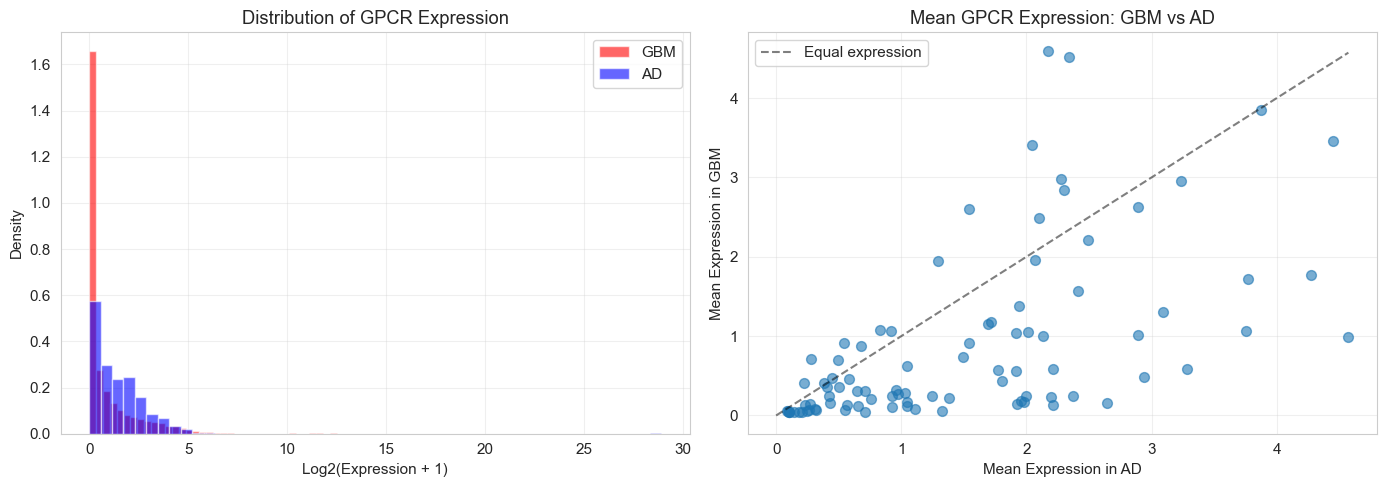

In [89]:
# FIGURE 1: Distribution of Expression by Disease

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Overall distribution
axes[0].hist(gbm_log.drop('Disease', axis=1).values.flatten(), 
             bins=50, alpha=0.6, label='GBM', color='red', density=True)
axes[0].hist(ad_log.drop('Disease', axis=1).values.flatten(), 
             bins=50, alpha=0.6, label='AD', color='blue', density=True)
axes[0].set_xlabel('Log2(Expression + 1)')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of GPCR Expression')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Mean expression comparison
mean_gbm = gbm_log.drop('Disease', axis=1).mean(axis=0)
mean_ad = ad_log.drop('Disease', axis=1).mean(axis=0)

axes[1].scatter(mean_ad, mean_gbm, alpha=0.6, s=50)
axes[1].plot([0, mean_ad.max()], [0, mean_ad.max()], 'k--', alpha=0.5, label='Equal expression')
axes[1].set_xlabel('Mean Expression in AD')
axes[1].set_ylabel('Mean Expression in GBM')
axes[1].set_title('Mean GPCR Expression: GBM vs AD')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Figure1_expression_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [91]:
# Differential expression analysis
results_list = []

for gene in final_genes:
    gbm_values = gbm_log[gene].values
    ad_values = ad_log[gene].values
    
    # Check normality (skip if too many samples)
    if len(gbm_values) < 5000:
        _, p_norm_gbm = shapiro(gbm_values)
        _, p_norm_ad = shapiro(ad_values)
    else:
        p_norm_gbm = 0  # Assume non-normal for large samples
        p_norm_ad = 0
    
    # Choose appropriate statistical test
    if p_norm_gbm > 0.05 and p_norm_ad > 0.05:
        # Both normal → use t-test
        stat, p_val = ttest_ind(gbm_values, ad_values)
        test_used = 't-test'
    else:
        # Not normal → use Mann-Whitney U
        stat, p_val = mannwhitneyu(gbm_values, ad_values, alternative='two-sided')
        test_used = 'Mann-Whitney U'
    
    # Calculate effect size (Cohen's d)
    mean_gbm = np.mean(gbm_values)
    mean_ad = np.mean(ad_values)
    pooled_std = np.sqrt((np.std(gbm_values)**2 + np.std(ad_values)**2) / 2)
    cohens_d = (mean_gbm - mean_ad) / pooled_std if pooled_std > 0 else 0
    
    results_list.append({
        'GPCR': gene,
        'Family': gpcr_families.get(gene, 'Unknown'),
        'Mean_GBM': mean_gbm,
        'Mean_AD': mean_ad,
        'Log2FC': mean_gbm - mean_ad,
        'Statistic': stat,
        'P_value': p_val,
        'Cohens_d': cohens_d,
        'Test_used': test_used
    })

# Create results dataframe
diff_expr_results = pd.DataFrame(results_list)

# Apply FDR correction (Benjamini-Hochberg)
_, diff_expr_results['P_adjusted'], _, _ = multipletests(
    diff_expr_results['P_value'], 
    method='fdr_bh'
)

# Sort by adjusted p-value
diff_expr_results = diff_expr_results.sort_values('P_adjusted')

# Identify significant genes
diff_expr_results['Significant'] = diff_expr_results['P_adjusted'] < 0.05

print(f"Differential expression analysis")
print(f"\nTotal GPCRs tested: {len(diff_expr_results)}")
print(f"Significant GPCRs (FDR < 0.05): {diff_expr_results['Significant'].sum()}")

print("\nTop 10 most significant GPCRs:")
print(diff_expr_results[['GPCR', 'Family', 'Log2FC', 'P_adjusted', 'Cohens_d']].head(10))

# Save results
diff_expr_results.to_csv('differential_expression_results.csv', index=False)

Differential expression analysis

Total GPCRs tested: 90
Significant GPCRs (FDR < 0.05): 84

Top 10 most significant GPCRs:
      GPCR      Family    Log2FC     P_adjusted  Cohens_d
75    HTR6   Serotonin -0.664521  9.669109e-106 -0.575158
77   OPRD1      Opioid -1.275228  4.327417e-103 -1.074743
86   P2RY2  Purinergic -0.923539  9.527843e-103 -0.800817
47   GPR21  Orphan GPR -2.123190  1.120517e-102 -1.855954
73    HTR4   Serotonin -1.813310  2.835840e-102 -1.537527
80   OPRM1      Opioid -2.485735  6.844208e-102 -2.030761
66   HTR1B   Serotonin -1.027606  1.609379e-101 -0.869363
65   HTR1A   Serotonin -2.074266  1.478149e-100 -1.667601
0   ADORA1   Adenosine -2.687764  8.333458e-100 -2.371282
4   ADRA1A  Adrenergic -2.053335   3.380394e-99 -1.841148


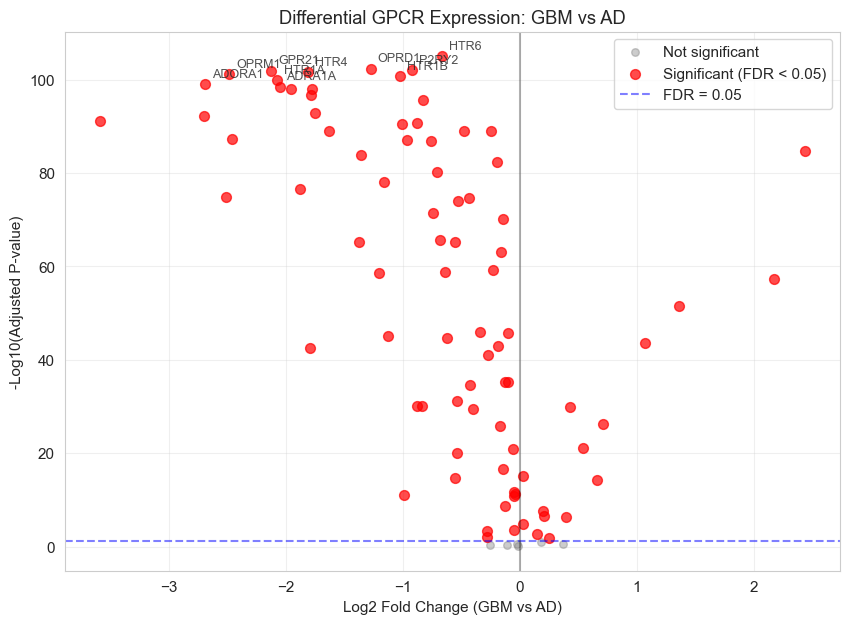

In [93]:
# FIGURE 2: Volcano Plot

plt.figure(figsize=(10, 7))

# Non-significant genes
ns = diff_expr_results[~diff_expr_results['Significant']]
plt.scatter(ns['Log2FC'], -np.log10(ns['P_adjusted']), 
            c='gray', alpha=0.4, s=30, label='Not significant')

# Significant genes
sig = diff_expr_results[diff_expr_results['Significant']]
plt.scatter(sig['Log2FC'], -np.log10(sig['P_adjusted']), 
            c='red', alpha=0.7, s=50, label='Significant (FDR < 0.05)')

# Add labels for top genes
top_genes = diff_expr_results.head(10)
for _, row in top_genes.iterrows():
    plt.annotate(row['GPCR'], 
                xy=(row['Log2FC'], -np.log10(row['P_adjusted'])),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

plt.axhline(-np.log10(0.05), color='blue', linestyle='--', alpha=0.5, label='FDR = 0.05')
plt.axvline(0, color='black', linestyle='-', alpha=0.3)

plt.xlabel('Log2 Fold Change (GBM vs AD)')
plt.ylabel('-Log10(Adjusted P-value)')
plt.title('Differential GPCR Expression: GBM vs AD')
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('Figure2_volcano_plot.png', dpi=300, bbox_inches='tight')
plt.show()

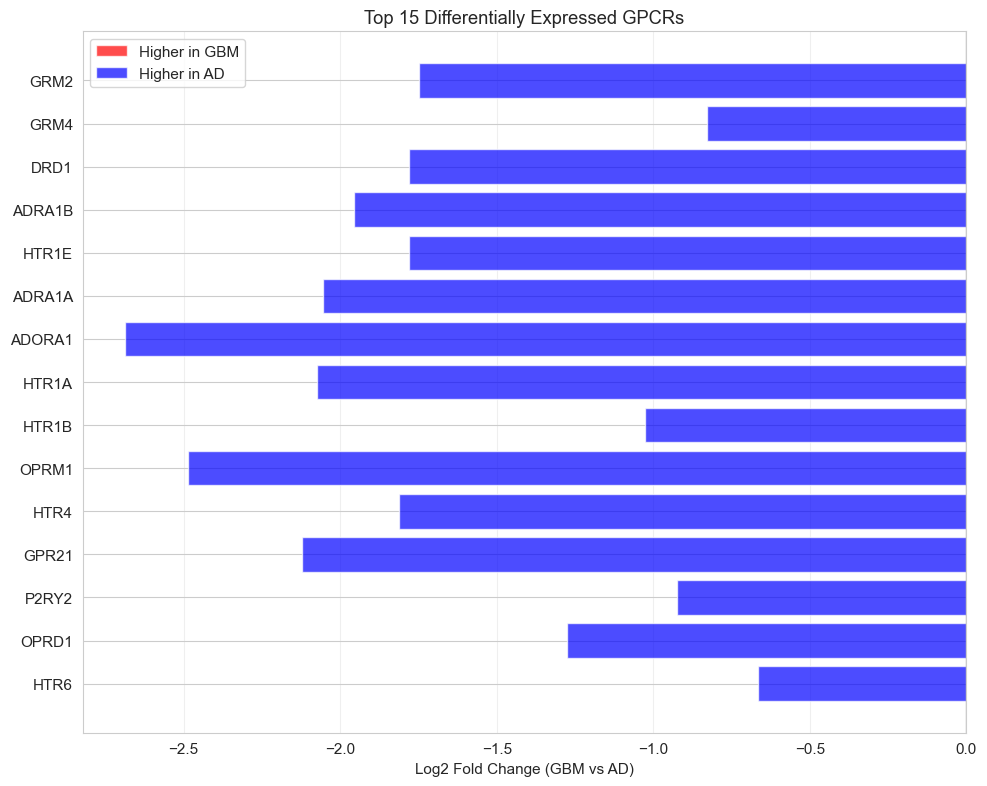

In [95]:
# FIGURE 3: Bar Plot of Top GPCRs

top_n = 15
top_diff = diff_expr_results.nsmallest(top_n, 'P_adjusted')

fig, ax = plt.subplots(figsize=(10, 8))

# Color by direction
colors = ['red' if x > 0 else 'blue' for x in top_diff['Log2FC']]

ax.barh(range(len(top_diff)), top_diff['Log2FC'], color=colors, alpha=0.7)
ax.set_yticks(range(len(top_diff)))
ax.set_yticklabels(top_diff['GPCR'])
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax.set_xlabel('Log2 Fold Change (GBM vs AD)')
ax.set_title(f'Top {top_n} Differentially Expressed GPCRs')
ax.grid(axis='x', alpha=0.3)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='Higher in GBM'),
    Patch(facecolor='blue', alpha=0.7, label='Higher in AD')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.savefig('Figure3_top_gpcrs_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
# Standardize the data (required for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Get explained variance
explained_var = pca.explained_variance_ratio_

print(f"\nPCA Variance explained:")
print(f"  PC1: {explained_var[0]:.1%}")
print(f"  PC2: {explained_var[1]:.1%}")
print(f"  First 5 PCs: {explained_var[:5].sum():.1%}")

# Create PCA dataframe
pca_df = pd.DataFrame(
    X_pca[:, :5],
    columns=[f'PC{i+1}' for i in range(5)],
    index=X.index
)
pca_df['Disease'] = y.values


PCA Variance explained:
  PC1: 76.6%
  PC2: 10.5%
  First 5 PCs: 92.3%


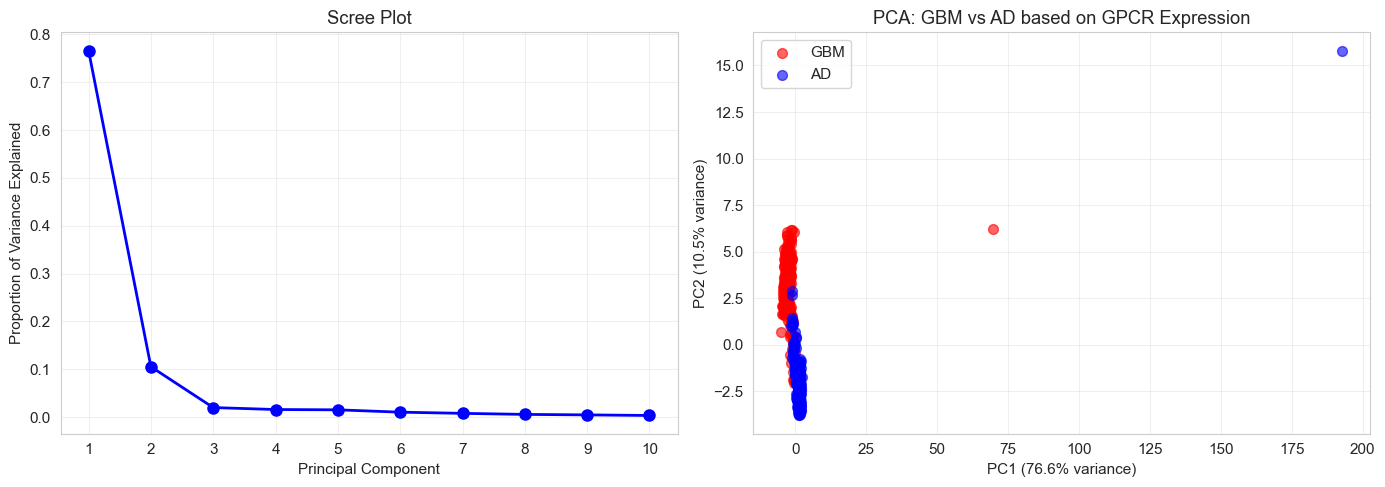

In [99]:
# FIGURE 4: PCA Visualizations

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scree plot
axes[0].plot(range(1, 11), explained_var, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Proportion of Variance Explained')
axes[0].set_title('Scree Plot')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(range(1, 11))

# Plot 2: PC1 vs PC2
for disease, color in [('GBM', 'red'), ('AD', 'blue')]:
    mask = pca_df['Disease'] == disease
    axes[1].scatter(
        pca_df.loc[mask, 'PC1'],
        pca_df.loc[mask, 'PC2'],
        c=color, label=disease, alpha=0.6, s=50
    )

axes[1].set_xlabel(f'PC1 ({explained_var[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({explained_var[1]:.1%} variance)')
axes[1].set_title('PCA: GBM vs AD based on GPCR Expression')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Figure4_pca.png', dpi=300, bbox_inches='tight')
plt.show()

In [101]:
# Examine which GPCRs contribute most to PC1
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

loadings['PC1_abs'] = loadings['PC1'].abs()
loadings['Family'] = loadings.index.map(gpcr_families)

print("Top 10 GPCRs contributing to PC1:")
print(loadings.nlargest(10, 'PC1_abs')[['PC1', 'Family']])

# Save loadings
loadings.to_csv('pca_loadings.csv')

Top 10 GPCRs contributing to PC1:
                  PC1      Family
gene_symbol                      
HTR6         0.119005   Serotonin
GPR55        0.118371  Orphan GPR
GRM4         0.117889   Glutamate
P2RY4        0.117843  Purinergic
P2RY2        0.117772  Purinergic
CCR9         0.117721   Chemokine
CXCR5        0.117572   Chemokine
CXCR1        0.117463   Chemokine
GPR35        0.117409  Orphan GPR
DRD5         0.117377    Dopamine


In [103]:
###CLustering
# Determine optimal number of clusters using silhouette scores
silhouette_scores = []
K_range = range(2, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette score = {score:.3f}")

# Select optimal k
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal k: {optimal_k} (silhouette score = {max(silhouette_scores):.3f})")

# Perform final clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to PCA dataframe
pca_df['Cluster'] = cluster_labels

# Cross-tabulation: clusters vs disease
crosstab = pd.crosstab(pca_df['Cluster'], pca_df['Disease'])
print("\nCluster vs Disease cross-tabulation:")
print(crosstab)

crosstab.to_csv('cluster_crosstab.csv')

k=2: Silhouette score = 0.964
k=3: Silhouette score = 0.431
k=4: Silhouette score = 0.438
k=5: Silhouette score = 0.274

Optimal k: 2 (silhouette score = 0.964)

Cluster vs Disease cross-tabulation:
Disease   AD  GBM
Cluster          
0        377  271
1          1    0


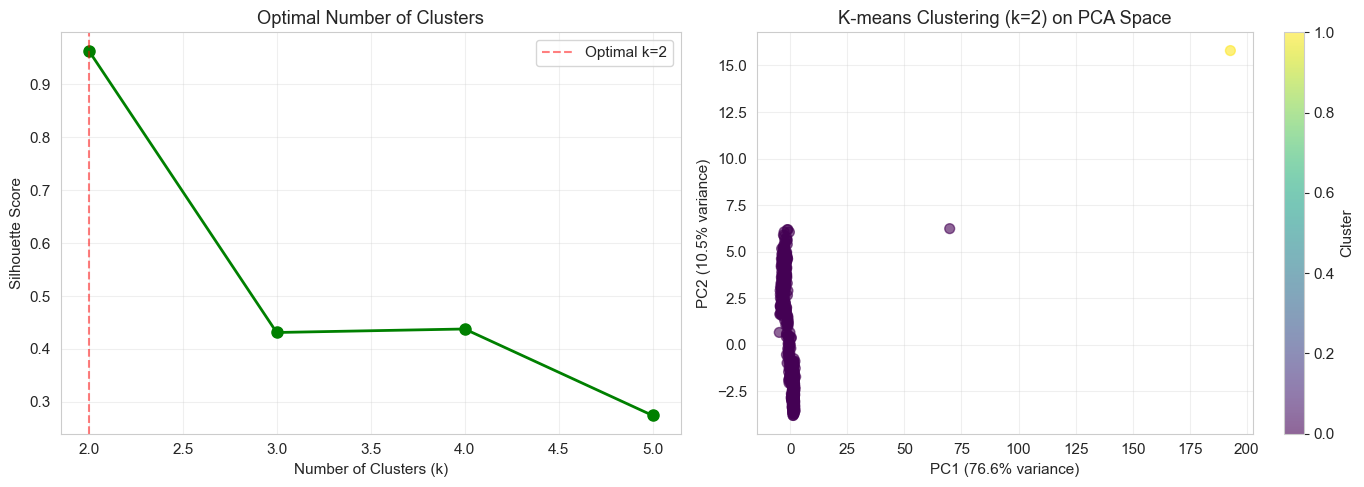

In [105]:
# FIGURE 5: Clustering Visualization

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Silhouette scores
axes[0].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Optimal Number of Clusters')
axes[0].grid(alpha=0.3)
axes[0].axvline(optimal_k, color='red', linestyle='--', alpha=0.5, label=f'Optimal k={optimal_k}')
axes[0].legend()

# Plot 2: Clusters on PCA space
scatter = axes[1].scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)
axes[1].set_xlabel(f'PC1 ({explained_var[0]:.1%} variance)')
axes[1].set_ylabel(f'PC2 ({explained_var[1]:.1%} variance)')
axes[1].set_title(f'K-means Clustering (k={optimal_k}) on PCA Space')
plt.colorbar(scatter, ax=axes[1], label='Cluster')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Figure5_clustering.png', dpi=300, bbox_inches='tight')
plt.show()


In [108]:
#Machin Learning
# Encode labels: GBM=0, AD=1
y_encoded = (y == 'AD').astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_encoded
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Model 1: Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\nLogistic regression resutls")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['GBM', 'AD']))

# Model 2: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Resutls")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['GBM', 'AD']))

# Cross-validation
cv_scores_lr = cross_val_score(log_reg, X_scaled, y_encoded, cv=5)
cv_scores_rf = cross_val_score(rf_clf, X_scaled, y_encoded, cv=5)


print("Cross Validation (5-fold)")
print(f"Logistic Regression: {cv_scores_lr.mean():.3f} ± {cv_scores_lr.std():.3f}")
print(f"Random Forest: {cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}")

Training set: 454 samples
Test set: 195 samples

Logistic regression resutls
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

         GBM       1.00      1.00      1.00        81
          AD       1.00      1.00      1.00       114

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Random Forest Resutls
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

         GBM       1.00      1.00      1.00        81
          AD       1.00      1.00      1.00       114

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Cross Validation (5-fold)
Logistic Regression: 0.988 ± 0.021
Random Forest: 0.998 ± 0.003


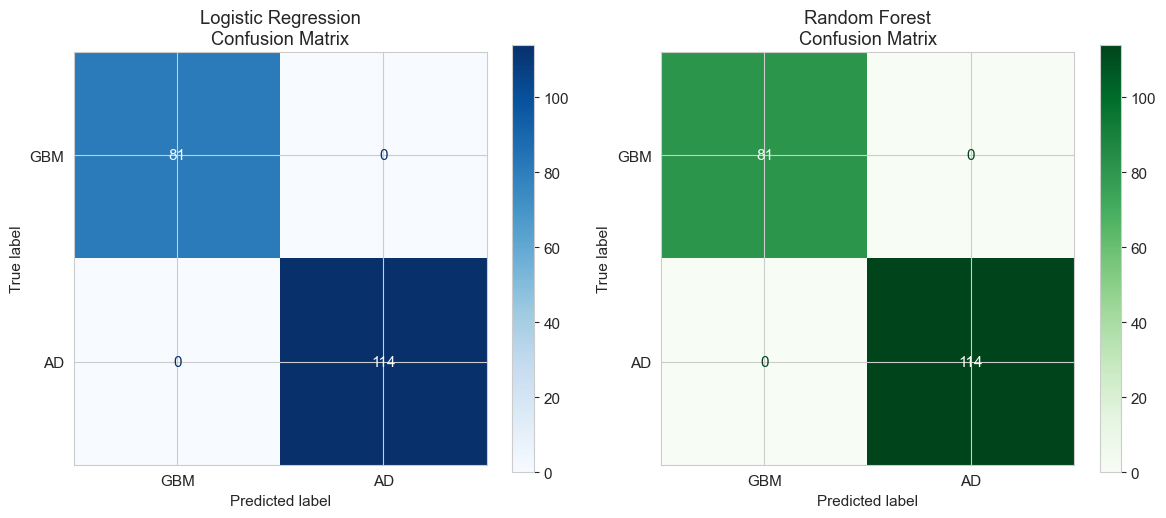

In [110]:
# FIGURE 6: Confusion Matrices

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr,
    display_labels=['GBM', 'AD'],
    ax=axes[0],
    cmap='Blues'
)
axes[0].set_title('Logistic Regression\nConfusion Matrix')

# Random Forest
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=['GBM', 'AD'],
    ax=axes[1],
    cmap='Greens'
)
axes[1].set_title('Random Forest\nConfusion Matrix')

plt.tight_layout()
plt.savefig('Figure6_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


Top 10 Most Important GPCRs for Classification:
      GPCR  Importance      Family
0   ADORA1    0.133947   Adenosine
86   P2RY2    0.119262  Purinergic
75    HTR6    0.069926   Serotonin
47   GPR21    0.064609  Orphan GPR
80   OPRM1    0.059330      Opioid
4   ADRA1A    0.054740  Adrenergic
62    GRM6    0.046435   Glutamate
77   OPRD1    0.045034      Opioid
5   ADRA1B    0.042188  Adrenergic
54   GPR68    0.030747  Orphan GPR


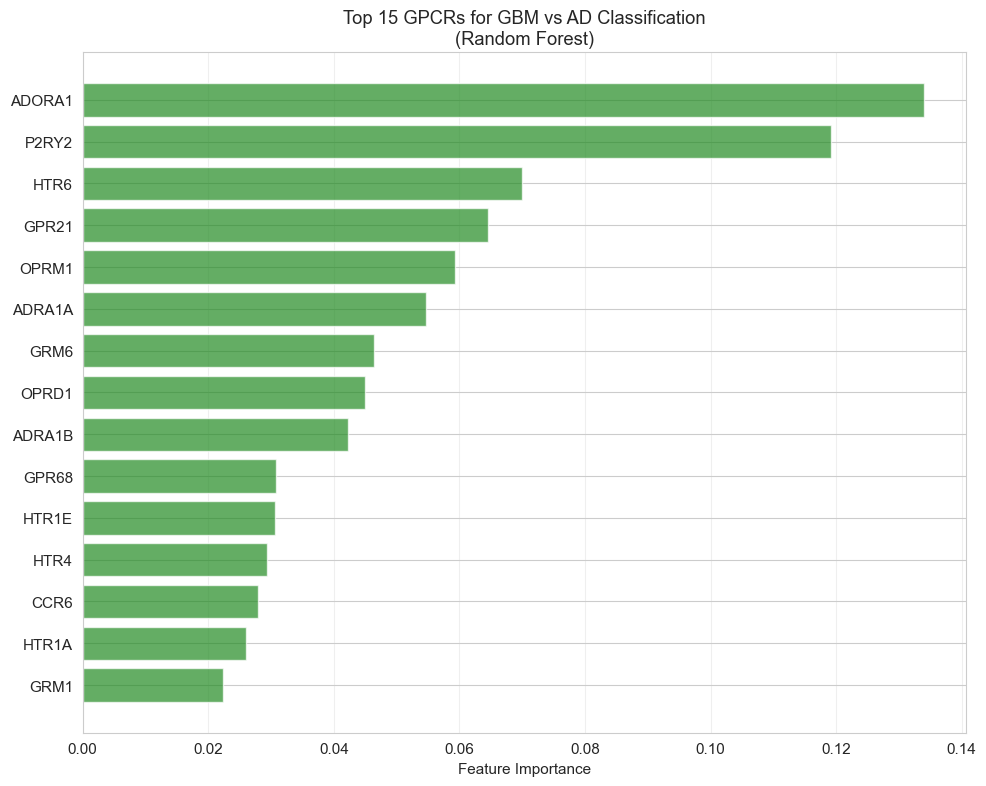

In [111]:
# FIGURE 7: Feature Importance (Random Forest)

# Get feature importances
feature_importance = pd.DataFrame({
    'GPCR': X.columns,
    'Importance': rf_clf.feature_importances_,
    'Family': [gpcr_families.get(g, 'Unknown') for g in X.columns]
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important GPCRs for Classification:")
print(feature_importance.head(10))

# Save
feature_importance.to_csv('feature_importance.csv', index=False)

# Plot
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='forestgreen', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['GPCR'])
plt.xlabel('Feature Importance')
plt.title('Top 15 GPCRs for GBM vs AD Classification\n(Random Forest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('Figure7_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


In [114]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model 3: Decision Tree Classifier
print("Descision Tree Classification Results")

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=10)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['GBM', 'AD']))

# Cross-validation
cv_scores_dt = cross_val_score(dt_clf, X_scaled, y_encoded, cv=5)
print(f"\nCross-validation (5-fold): {cv_scores_dt.mean():.3f} ± {cv_scores_dt.std():.3f}")

# Model comparison
print("\nModel Comparison Summary\n")
comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Test Accuracy': [accuracy_score(y_test, y_pred_lr), 
                     accuracy_score(y_test, y_pred_rf),
                     accuracy_score(y_test, y_pred_dt)],
    'CV Mean ± Std': [f"{cv_scores_lr.mean():.3f} ± {cv_scores_lr.std():.3f}",
                      f"{cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}",
                      f"{cv_scores_dt.mean():.3f} ± {cv_scores_dt.std():.3f}"]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

comparison_df.to_csv('model_comparison.csv', index=False)

Descision Tree Classification Results
Accuracy: 0.995

Classification Report:
              precision    recall  f1-score   support

         GBM       1.00      0.99      0.99        81
          AD       0.99      1.00      1.00       114

    accuracy                           0.99       195
   macro avg       1.00      0.99      0.99       195
weighted avg       0.99      0.99      0.99       195


Cross-validation (5-fold): 0.988 ± 0.014

Model Comparison Summary

              Model  Test Accuracy CV Mean ± Std
Logistic Regression       1.000000 0.988 ± 0.021
      Random Forest       1.000000 0.998 ± 0.003
      Decision Tree       0.994872 0.988 ± 0.014


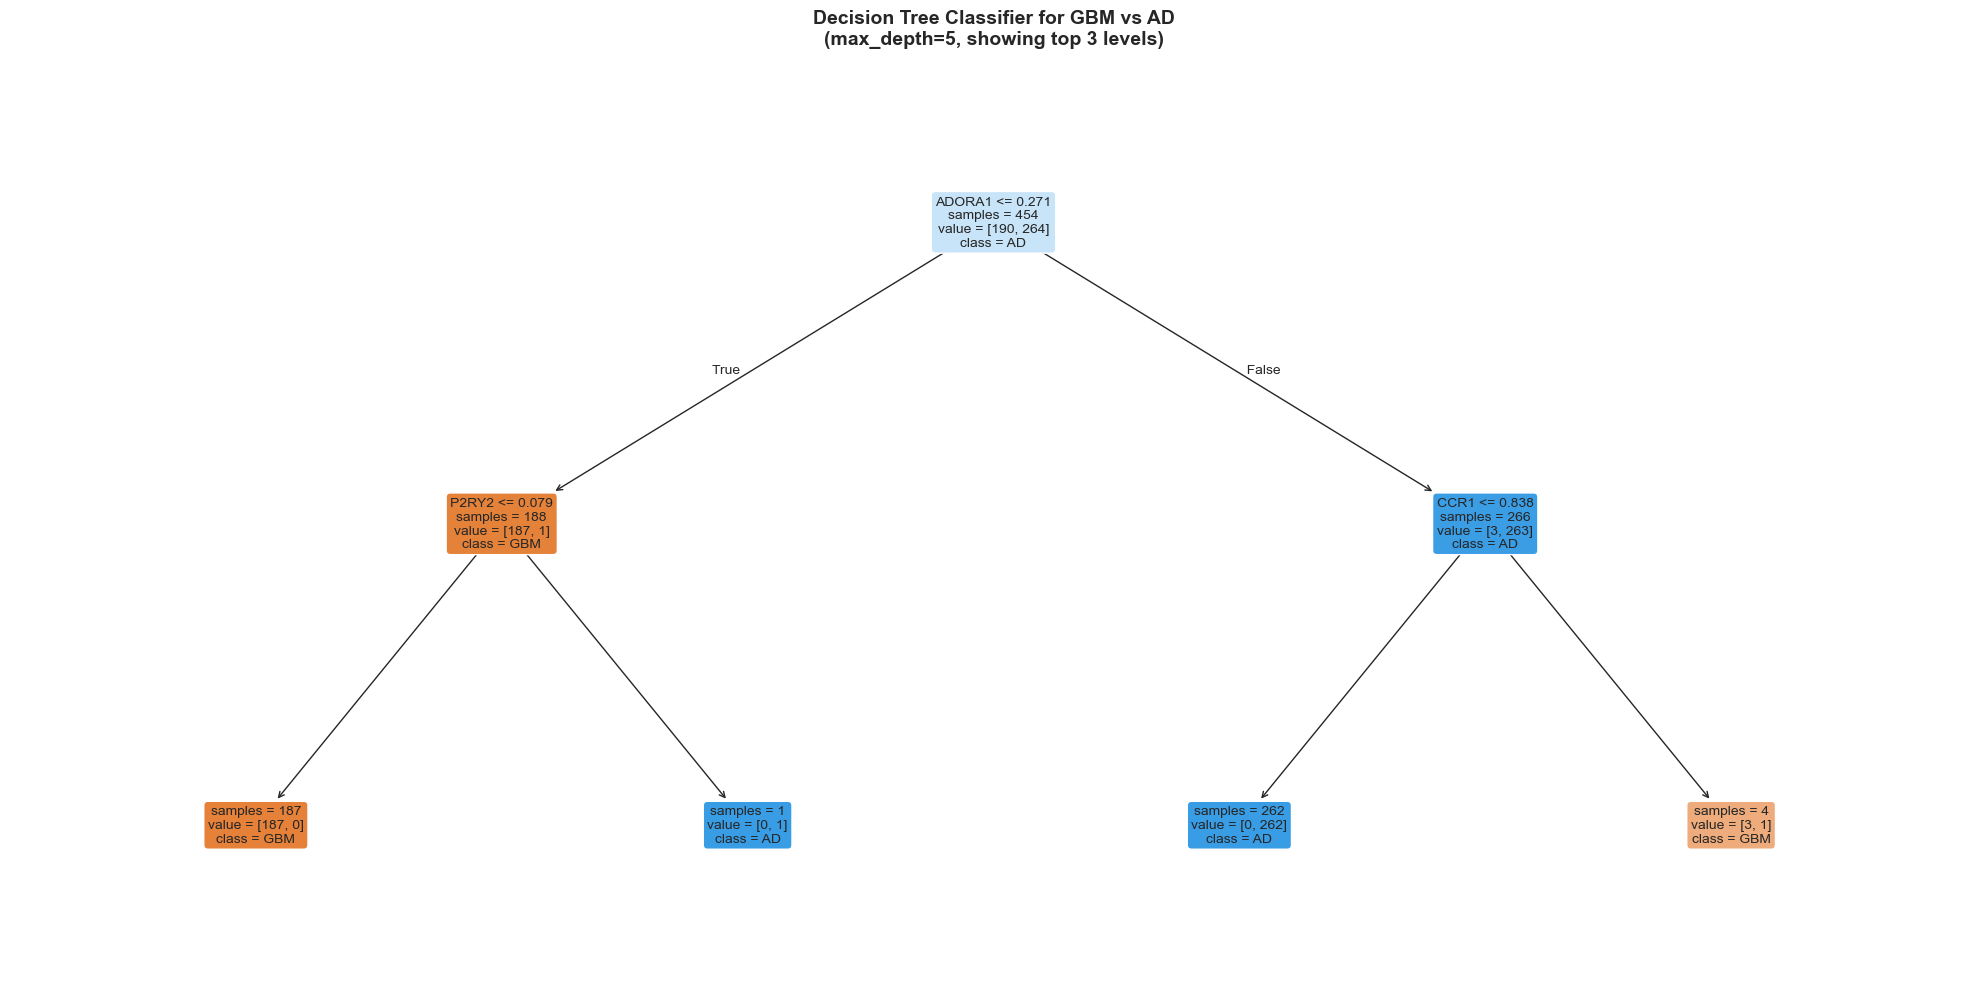

In [117]:
# Decision Tree Visualization

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, 
          feature_names=X.columns, 
          class_names=['GBM', 'AD'],
          filled=True, 
          fontsize=10,
          max_depth=3,  # Show only top 3 levels for clarity
          impurity=False,
          rounded=True)

plt.title('Decision Tree Classifier for GBM vs AD\n(max_depth=5, showing top 3 levels)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('Figure_DecisionTree.png', dpi=300, bbox_inches='tight')
plt.show()


In [118]:
# Summarize results by GPCR family
family_summary = diff_expr_results.groupby('Family').agg({
    'GPCR': 'count',
    'Log2FC': 'mean',
    'P_adjusted': lambda x: (x < 0.05).sum(),
    'Cohens_d': 'mean'
}).round(3)

family_summary.columns = ['N_GPCRs', 'Mean_Log2FC', 'N_Significant', 'Mean_Effect_Size']
family_summary = family_summary.sort_values('Mean_Log2FC', ascending=False)

print("Summary by GPCR Family:")
print(family_summary)

family_summary.to_csv('family_summary.csv')

Summary by GPCR Family:
             N_GPCRs  Mean_Log2FC  N_Significant  Mean_Effect_Size
Family                                                            
Complement         2        0.684              2             0.514
Adenosine          4        0.140              4             0.023
Chemokine         18        0.035             15            -0.009
Cannabinoid        2       -0.032              1            -0.026
Purinergic         8       -0.193              7            -0.153
Orphan GPR        18       -0.470             17            -0.382
Dopamine           5       -0.551              5            -0.464
Adrenergic         9       -0.932              9            -0.825
Serotonin         12       -1.156             12            -0.910
Opioid             4       -1.650              4            -1.347
Glutamate          8       -1.965              8            -1.498

✓ Family summary saved


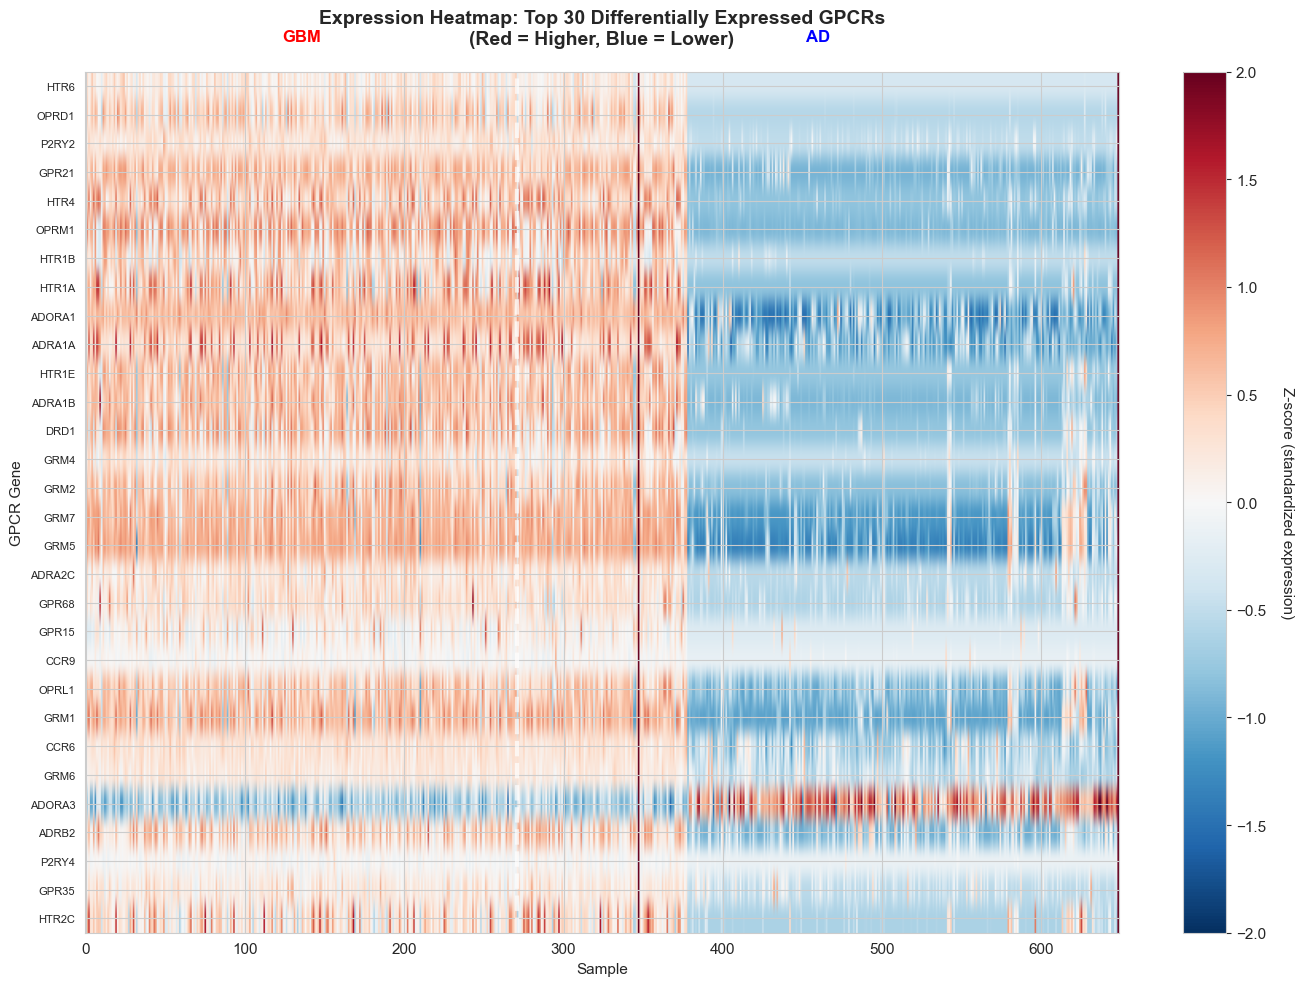

In [120]:
# FIGURE 8: Simple Expression Heatmap (Lecture-Safe Version)

# Select top differentially expressed GPCRs
top_genes_for_heatmap = diff_expr_results.nsmallest(30, 'P_adjusted')['GPCR'].tolist()

# Create matrix (samples as columns, genes as rows)
heatmap_data = X[top_genes_for_heatmap].T

# Standardize each gene (z-score normalization)
heatmap_data_z = (heatmap_data - heatmap_data.mean(axis=1).values.reshape(-1, 1)) / heatmap_data.std(axis=1).values.reshape(-1, 1)

# Sort samples by disease type for better visualization
sorted_indices = y.argsort()  # Sort so GBM and AD are grouped
heatmap_data_z = heatmap_data_z.iloc[:, sorted_indices]

# Plot
plt.figure(figsize=(14, 10))
im = plt.imshow(heatmap_data_z, aspect='auto', cmap='RdBu_r', vmin=-2, vmax=2)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('Z-score (standardized expression)', rotation=270, labelpad=20)

# Labels
plt.ylabel('GPCR Gene')
plt.xlabel('Sample')
plt.title('Expression Heatmap: Top 30 Differentially Expressed GPCRs\n(Red = Higher, Blue = Lower)', 
          fontsize=14, fontweight='bold', pad=20)

# Y-axis gene labels
plt.yticks(range(len(top_genes_for_heatmap)), top_genes_for_heatmap, fontsize=8)

# Add vertical line to separate GBM from AD
n_gbm = (y == 'GBM').sum()
plt.axvline(n_gbm-0.5, color='white', linewidth=3, linestyle='--', alpha=0.7)

# Add text labels
n_ad = (y == 'AD').sum()
plt.text(n_gbm/2, -2, 'GBM', ha='center', va='top', fontsize=12, fontweight='bold', color='red')
plt.text(n_gbm + n_ad/2, -2, 'AD', ha='center', va='top', fontsize=12, fontweight='bold', color='blue')

plt.tight_layout()
plt.savefig('Figure8_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [123]:
print("="*70)
print("SURVIVAL ANALYSIS: GBM PATIENTS")
print("="*70)

gbm_indices = y == 'GBM'
gbm_expr = X[gbm_indices].copy()

print(f"\nGBM samples with expression data: {gbm_expr.shape[0]}")

try:
    survival_data = gbm_merged[['tumor_id', 'survival_days']].dropna()
    print(f"Samples with survival data: {len(survival_data)}")
    print(f"Survival range: {survival_data['survival_days'].min():.0f} - {survival_data['survival_days'].max():.0f} days")
    print(f"Median survival: {survival_data['survival_days'].median():.0f} days")
    
    n_samples = min(len(gbm_expr), len(survival_data))
    print(f"\nUsing {n_samples} samples for analysis")
    has_survival_data = True
    
except Exception as e:
    print(f"\n⚠ Could not load survival data: {e}")
    has_survival_data = False

if has_survival_data:
    top_gpcrs_for_survival = diff_expr_results.nsmallest(10, 'P_adjusted')['GPCR'].tolist()
    
    print("\nTesting correlation between top 10 GPCRs and survival:")
    print("-" * 70)
    
    survival_correlations = []
    
    for gpcr in top_gpcrs_for_survival:
        if gpcr in gbm_expr.columns:
            expr_values = gbm_expr[gpcr].values[:n_samples]
            surv_values = survival_data['survival_days'].values[:n_samples]
            
            corr, pval = spearmanr(expr_values, surv_values)
            
            survival_correlations.append({
                'GPCR': gpcr,
                'Spearman_rho': corr,
                'P_value': pval,
                'Significance': '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else 'ns'
            })
            
            sig = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else '  '
            print(f"{gpcr:12s} | rho = {corr:6.3f} | p = {pval:.4f} {sig}")
    
    survival_corr_df = pd.DataFrame(survival_correlations).sort_values('P_value')
    
    print("\n" + "="*70)
    sig_survival = survival_corr_df[survival_corr_df['P_value'] < 0.05]
    if len(sig_survival) > 0:
        print(f"GPCRs with significant survival correlation (p < 0.05): {len(sig_survival)}")
        print(sig_survival.to_string(index=False))
    else:
        print("No significant correlations found")
    
    survival_corr_df.to_csv('survival_correlations.csv', index=False)

SURVIVAL ANALYSIS: GBM PATIENTS

GBM samples with expression data: 271
Samples with survival data: 2151
Survival range: 62 - 1293 days
Median survival: 442 days

Using 271 samples for analysis

Testing correlation between top 10 GPCRs and survival:
----------------------------------------------------------------------
HTR6         | rho =  0.030 | p = 0.6185   
OPRD1        | rho = -0.086 | p = 0.1603   
P2RY2        | rho = -0.093 | p = 0.1258   
GPR21        | rho =  0.183 | p = 0.0025 **
HTR4         | rho = -0.025 | p = 0.6870   
OPRM1        | rho = -0.068 | p = 0.2637   
HTR1B        | rho =  0.171 | p = 0.0048 **
HTR1A        | rho = -0.042 | p = 0.4862   
ADORA1       | rho = -0.228 | p = 0.0002 ***
ADRA1A       | rho =  0.076 | p = 0.2133   

GPCRs with significant survival correlation (p < 0.05): 3
  GPCR  Spearman_rho  P_value Significance
ADORA1     -0.227530 0.000158          ***
 GPR21      0.183192 0.002466           **
 HTR1B      0.170888 0.004788           **


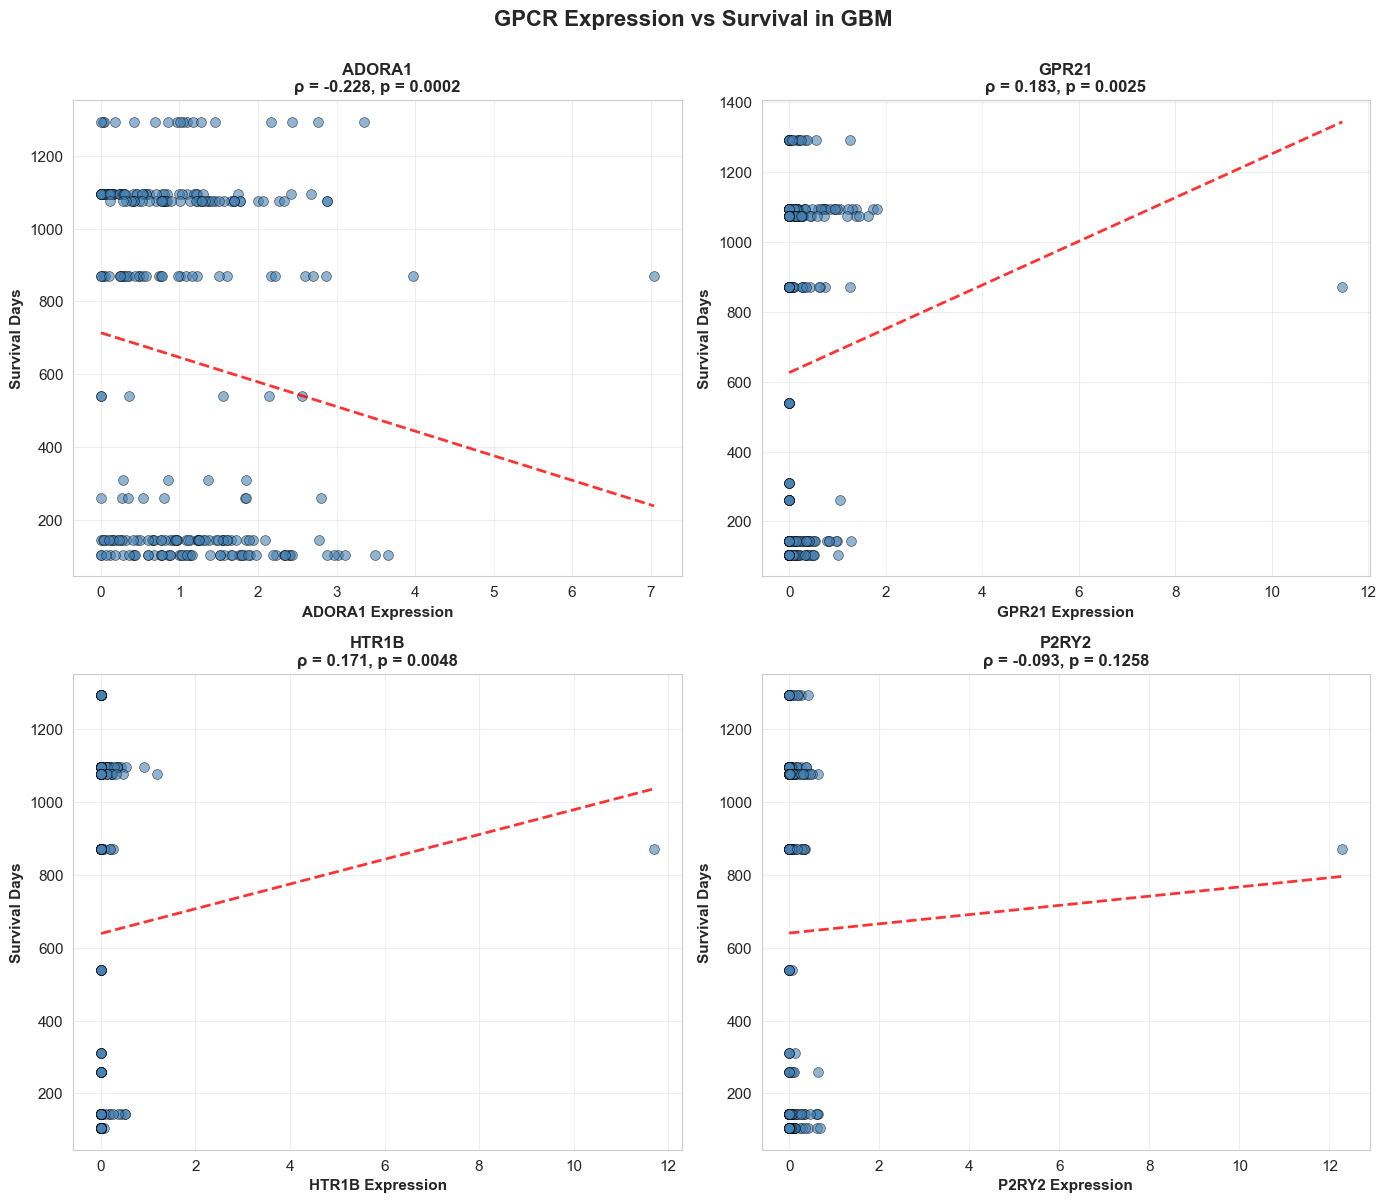

In [125]:
if has_survival_data and len(survival_correlations) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.ravel()
    
    for idx, (_, row) in enumerate(survival_corr_df.iloc[:4].iterrows()):
        gpcr = row['GPCR']
        x_data = gbm_expr[gpcr].values[:n_samples]
        y_data = survival_data['survival_days'].values[:n_samples]
        
        axes[idx].scatter(x_data, y_data, alpha=0.6, s=50, color='steelblue', edgecolors='black', linewidth=0.5)
        
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        x_line = np.linspace(x_data.min(), x_data.max(), 100)
        axes[idx].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
        
        axes[idx].set_xlabel(f'{gpcr} Expression', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Survival Days', fontsize=11, fontweight='bold')
        axes[idx].set_title(f"{gpcr}\nρ = {row['Spearman_rho']:.3f}, p = {row['P_value']:.4f}", 
                           fontsize=12, fontweight='bold')
        axes[idx].grid(alpha=0.3)
    
    plt.suptitle('GPCR Expression vs Survival in GBM', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('Figure_Survival_Correlations.png', dpi=300, bbox_inches='tight')
    plt.show()

In [126]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Regression: Predict survival days from GBM expression")


if has_survival_data:
    try:
        X_survival = gbm_expr.iloc[:n_samples]
        y_survival = survival_data['survival_days'].values[:n_samples]
        
        X_train_surv, X_test_surv, y_train_surv, y_test_surv = train_test_split(
            X_survival, y_survival, test_size=0.3, random_state=42)
        
        scaler_surv = StandardScaler()
        X_train_surv_scaled = scaler_surv.fit_transform(X_train_surv)
        X_test_surv_scaled = scaler_surv.transform(X_test_surv)
        
        # Random Forest
        rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_regressor.fit(X_train_surv_scaled, y_train_surv)
        y_pred_rf_surv = rf_regressor.predict(X_test_surv_scaled)
        
        r2_rf_surv = r2_score(y_test_surv, y_pred_rf_surv)
        mae_rf_surv = mean_absolute_error(y_test_surv, y_pred_rf_surv)
        
        print(f"\nRandom Forest: R² = {r2_rf_surv:.3f}, MAE = {mae_rf_surv:.1f} days")
        
        # Gradient Boosting
        gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
        gb_regressor.fit(X_train_surv_scaled, y_train_surv)
        y_pred_gb_surv = gb_regressor.predict(X_test_surv_scaled)
        
        r2_gb_surv = r2_score(y_test_surv, y_pred_gb_surv)
        mae_gb_surv = mean_absolute_error(y_test_surv, y_pred_gb_surv)
        
        print(f"Gradient Boosting: R² = {r2_gb_surv:.3f}, MAE = {mae_gb_surv:.1f} days")
        
        best_r2 = max(r2_rf_surv, r2_gb_surv)
        print(f"\n→ GPCR expression explains {best_r2*100:.1f}% of variance in survival")
        
        has_regression_results = True
    except Exception as e:
        print(f"Error: {e}")
        has_regression_results = False
else:
    has_regression_results = False

Regression: Predict survival days from GBM expression

Random Forest: R² = 0.286, MAE = 340.0 days
Gradient Boosting: R² = 0.228, MAE = 340.5 days

→ GPCR expression explains 28.6% of variance in survival


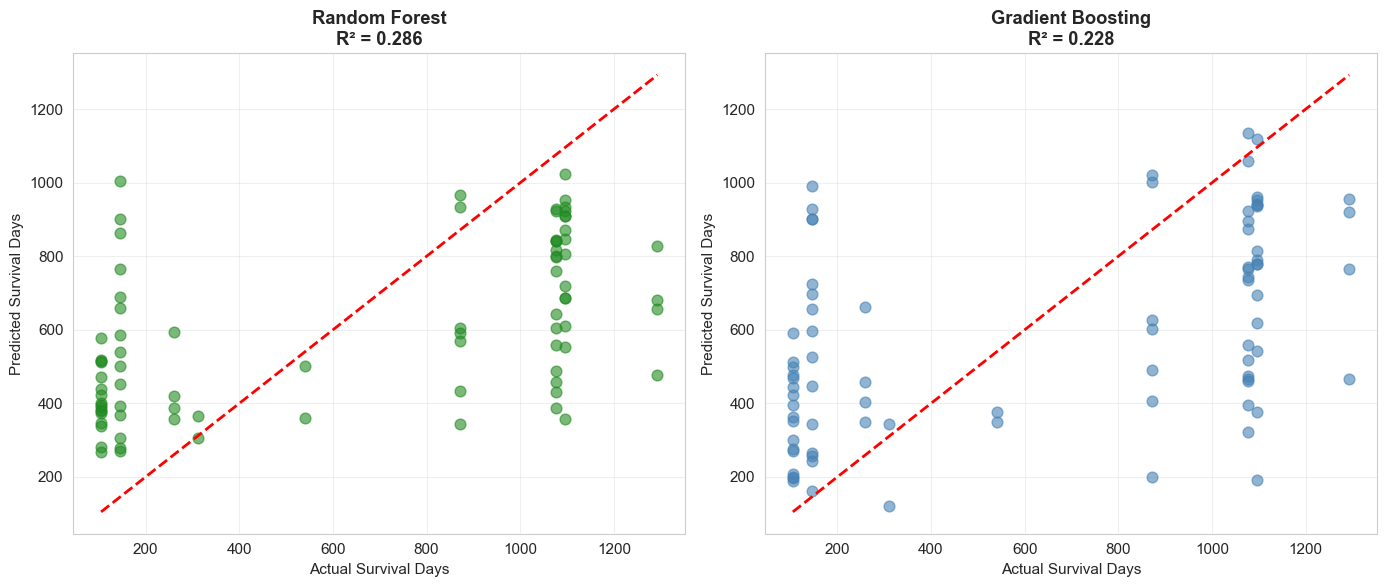

In [128]:
if has_regression_results:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    axes[0].scatter(y_test_surv, y_pred_rf_surv, alpha=0.6, s=60, color='forestgreen')
    axes[0].plot([y_test_surv.min(), y_test_surv.max()], [y_test_surv.min(), y_test_surv.max()], 'r--', lw=2)
    axes[0].set_title(f'Random Forest\nR² = {r2_rf_surv:.3f}', fontweight='bold')
    axes[0].set_xlabel('Actual Survival Days')
    axes[0].set_ylabel('Predicted Survival Days')
    axes[0].grid(alpha=0.3)
    
    axes[1].scatter(y_test_surv, y_pred_gb_surv, alpha=0.6, s=60, color='steelblue')
    axes[1].plot([y_test_surv.min(), y_test_surv.max()], [y_test_surv.min(), y_test_surv.max()], 'r--', lw=2)
    axes[1].set_title(f'Gradient Boosting\nR² = {r2_gb_surv:.3f}', fontweight='bold')
    axes[1].set_xlabel('Actual Survival Days')
    axes[1].set_ylabel('Predicted Survival Days')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('Figure_Survival_Regression.png', dpi=300, bbox_inches='tight')
    plt.show()

In [129]:
# ============================================================================
# DRUG TARGET DATABASE
# ============================================================================

# Curated database of FDA-approved drugs targeting GPCRs
gpcr_drug_targets = {
    # Chemokine receptors (GBM-enriched)
    'CXCR4': {
        'approved': ['Plerixafor (Mozobil) - stem cell mobilization'],
        'investigational': ['CXCR4 antagonists in GBM clinical trials'],
        'indication': 'Anti-invasive strategy in GBM'
    },
    'CCR5': {
        'approved': ['Maraviroc (Selzentry) - HIV'],
        'investigational': ['CCR5 antagonists for cancer immunotherapy'],
        'indication': 'Immune modulation'
    },
    'CCR2': {
        'approved': [],
        'investigational': ['CCR2 antagonists - inflammatory diseases'],
        'indication': 'Immune infiltration'
    },
    'CCR1': {
        'approved': [],
        'investigational': ['CCR1 antagonists for inflammatory diseases'],
        'indication': 'Immune cell recruitment'
    },
    
    # Complement receptors (GBM-enriched)
    'C5AR1': {
        'approved': ['Avacopan - ANCA vasculitis'],
        'investigational': ['C5a inhibitors in cancer'],
        'indication': 'Complement inhibition in tumor microenvironment'
    },
    'C3AR1': {
        'approved': [],
        'investigational': ['Complement inhibitors in development'],
        'indication': 'Tumor immunosuppression'
    },
    
    # Adenosine receptors
    'ADORA3': {
        'approved': [],
        'investigational': ['A3 receptor antagonists for cancer'],
        'indication': 'Hypoxia-induced tumor survival'
    },
    'ADORA1': {
        'approved': ['Regadenoson - cardiac stress test'],
        'investigational': ['A1 agonists for neuroprotection'],
        'indication': 'Neuronal excitability modulation'
    },
    'ADORA2A': {
        'approved': ['Istradefylline - Parkinson disease'],
        'investigational': ['A2A antagonists for cancer immunotherapy'],
        'indication': 'Immune checkpoint modulation'
    },
    
    # Serotonin receptors (AD-enriched)
    'HTR1A': {
        'approved': ['Buspirone - anxiety', 'Tandospirone - depression'],
        'investigational': ['HTR1A partial agonists for cognition'],
        'indication': 'Mood and cognitive function'
    },
    'HTR2A': {
        'approved': ['Risperidone, Olanzapine - antipsychotics', 'Pimavanserin - Parkinson psychosis'],
        'investigational': ['Psilocybin for depression/dementia'],
        'indication': 'Behavioral symptoms in AD'
    },
    'HTR6': {
        'approved': [],
        'investigational': ['HTR6 antagonists - cognitive enhancement in AD'],
        'indication': 'Memory and cognition'
    },
    'HTR4': {
        'approved': ['Prucalopride - constipation'],
        'investigational': ['HTR4 agonists for cognition'],
        'indication': 'Cognitive enhancement'
    },
    'HTR1B': {
        'approved': ['Triptans (sumatriptan) - migraine'],
        'investigational': [],
        'indication': 'Vascular and neuronal signaling'
    },
    
    # Dopamine receptors (AD-enriched)
    'DRD2': {
        'approved': ['Haloperidol - antipsychotic', 'Bromocriptine - Parkinson', 'Aripiprazole - schizophrenia'],
        'investigational': ['Selective D2 modulators'],
        'indication': 'Cognitive and motor symptoms'
    },
    'DRD1': {
        'approved': [],
        'investigational': ['D1 agonists for cognitive enhancement'],
        'indication': 'Working memory and attention'
    },
    'DRD3': {
        'approved': ['Pramipexole, Ropinirole - Parkinson'],
        'investigational': ['D3 selective antagonists'],
        'indication': 'Motor control and motivation'
    },
    
    # Glutamate receptors (AD-enriched)
    'GRM5': {
        'approved': [],
        'investigational': ['GRM5 positive/negative allosteric modulators for AD, anxiety, fragile X'],
        'indication': 'Synaptic plasticity and cognition'
    },
    'GRM1': {
        'approved': [],
        'investigational': ['GRM1 antagonists for cancer'],
        'indication': 'Synaptic transmission'
    },
    'GRM2': {
        'approved': [],
        'investigational': ['GRM2/3 agonists for anxiety, schizophrenia'],
        'indication': 'Neurotransmitter modulation'
    },
    'GRM3': {
        'approved': [],
        'investigational': ['GRM2/3 modulators for schizophrenia'],
        'indication': 'Glutamatergic signaling'
    },
    'GRM7': {
        'approved': [],
        'investigational': ['GRM7 modulators for anxiety'],
        'indication': 'Anxiety and stress response'
    },
    
    # Adrenergic receptors
    'ADRA1A': {
        'approved': ['Tamsulosin - BPH', 'Doxazosin - hypertension'],
        'investigational': ['Repurposing for neurodegeneration'],
        'indication': 'Vascular and neuronal function'
    },
    'ADRA1B': {
        'approved': ['Prazosin - PTSD nightmares', 'Alpha-blockers - hypertension'],
        'investigational': [],
        'indication': 'Stress response and memory'
    },
    'ADRB2': {
        'approved': ['Albuterol - asthma', 'Formoterol - COPD'],
        'investigational': ['Beta-2 agonists for neuroprotection'],
        'indication': 'Neuroprotection, glial modulation'
    },
    
    # Opioid receptors (AD-enriched)
    'OPRM1': {
        'approved': ['Morphine, Fentanyl - pain'],
        'investigational': ['Opioid system in neurodegeneration'],
        'indication': 'Pain and emotional processing'
    },
    'OPRD1': {
        'approved': [],
        'investigational': ['Delta opioid agonists for neuroprotection'],
        'indication': 'Neuroprotection in AD'
    },
    'OPRK1': {
        'approved': [],
        'investigational': ['Kappa opioid antagonists for depression'],
        'indication': 'Mood and stress'
    },
    
    # Purinergic receptors
    'P2RY12': {
        'approved': ['Ticagrelor, Clopidogrel - antiplatelet'],
        'investigational': ['P2Y12 antagonists for neuroinflammation'],
        'indication': 'Microglial activation'
    },
    'P2RY2': {
        'approved': [],
        'investigational': ['P2Y2 agonists for dry eye, mucus clearance'],
        'indication': 'Inflammation and tissue repair'
    },
    
    # Cannabinoid receptors
    'CNR1': {
        'approved': ['Dronabinol, Nabilone - chemotherapy nausea'],
        'investigational': ['CB1 antagonists for metabolic disorders'],
        'indication': 'Appetite, memory, pain'
    },
    'CNR2': {
        'approved': [],
        'investigational': ['CB2 agonists for inflammation'],
        'indication': 'Immune modulation'
    },
    
    # Orphan GPCRs
    'GPR55': {
        'approved': [],
        'investigational': ['GPR55 modulators for pain, cancer'],
        'indication': 'Pain and inflammation'
    },
    'GPR183': {
        'approved': [],
        'investigational': ['EBI2 modulators for immune disorders'],
        'indication': 'Immune cell positioning'
    }
}

print(f"Drug Target Database: {len(gpcr_drug_targets)} GPCRs with drug information")
print(f"  Approved drugs: {sum(1 for v in gpcr_drug_targets.values() if v['approved'])}")
print(f"  Investigational only: {sum(1 for v in gpcr_drug_targets.values() if not v['approved'] and v['investigational'])}")

Drug Target Database: 34 GPCRs with drug information
  Approved drugs: 17
  Investigational only: 17


In [131]:

# CROSS-REFERENCE WITH DIFFERENTIAL EXPRESSION RESULTS

print("="*80)
print("TRANSLATIONAL POTENTIAL: TOP GPCRs WITH DRUG TARGETS")
print("="*80)

# Get top 20 differentially expressed GPCRs
top_gpcrs_for_drugs = diff_expr_results.nsmallest(20, 'P_adjusted')

drug_opportunities = []

for _, row in top_gpcrs_for_drugs.iterrows():
    gpcr = row['GPCR']
    if gpcr in gpcr_drug_targets:
        info = gpcr_drug_targets[gpcr]
        enriched_in = 'GBM' if row['Log2FC'] > 0 else 'AD'
        
        drug_opportunities.append({
            'GPCR': gpcr,
            'Enriched_In': enriched_in,
            'Log2FC': row['Log2FC'],
            'P_adj': row['P_adjusted'],
            'Approved_Drugs': '; '.join(info['approved']) if info['approved'] else 'None',
            'Investigational': '; '.join(info['investigational']) if info['investigational'] else 'None',
            'Indication': info['indication']
        })
        
        arrow = '↑' if enriched_in == 'GBM' else '↓'
        print(f"\n{gpcr} ({arrow} {enriched_in}, FC={row['Log2FC']:.2f})")
        if info['approved']:
            print(f"  ✓ Approved: {', '.join(info['approved'])}")
        else:
            print(f"  ○ Approved: None")
        if info['investigational']:
            print(f"  → Investigational: {', '.join(info['investigational'])}")
        print(f"  → Indication: {info['indication']}")

# Create DataFrame
drug_opportunities_df = pd.DataFrame(drug_opportunities)
drug_opportunities_df.to_csv('gpcr_drug_targets.csv', index=False)

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"Total druggable GPCRs among top 20: {len(drug_opportunities)}")

gbm_drugable = drug_opportunities_df[drug_opportunities_df['Enriched_In'] == 'GBM']
ad_drugable = drug_opportunities_df[drug_opportunities_df['Enriched_In'] == 'AD']

print(f"\nGBM-enriched GPCRs with drugs: {len(gbm_drugable)}")
for _, row in gbm_drugable.iterrows():
    drug_name = row['Approved_Drugs'] if row['Approved_Drugs'] != 'None' else row['Investigational']
    print(f"  • {row['GPCR']}: {drug_name}")

print(f"\nAD-enriched GPCRs with drugs: {len(ad_drugable)}")
for _, row in ad_drugable.iterrows():
    drug_name = row['Approved_Drugs'] if row['Approved_Drugs'] != 'None' else row['Investigational']
    print(f"  • {row['GPCR']}: {drug_name}")

print("\n" + "="*80)
print("KEY REPURPOSING OPPORTUNITIES")
print("="*80)
print("\n**For GBM (target immune/tumor microenvironment):**")
print("  • CXCR4 → Plerixafor (already in GBM trials)")
print("  • C5AR1 → Avacopan (complement inhibition)")
print("  • ADORA3 → A3 antagonists (hypoxic tumor targeting)")
print("  • ADORA2A → Istradefylline (immune checkpoint)")

print("\n**For AD (target neurotransmission/neuroprotection):**")
print("  • HTR6 → Serotonin antagonists (cognitive enhancement)")
print("  • GRM5 → Glutamate modulators (synaptic plasticity)")
print("  • OPRD1 → Delta opioid agonists (neuroprotection)")
print("  • DRD1 → Dopamine agonists (working memory)")
print("  • HTR4 → Prucalopride repurposing (cognition)")


TRANSLATIONAL POTENTIAL: TOP GPCRs WITH DRUG TARGETS

HTR6 (↓ AD, FC=-0.66)
  ○ Approved: None
  → Investigational: HTR6 antagonists - cognitive enhancement in AD
  → Indication: Memory and cognition

OPRD1 (↓ AD, FC=-1.28)
  ○ Approved: None
  → Investigational: Delta opioid agonists for neuroprotection
  → Indication: Neuroprotection in AD

P2RY2 (↓ AD, FC=-0.92)
  ○ Approved: None
  → Investigational: P2Y2 agonists for dry eye, mucus clearance
  → Indication: Inflammation and tissue repair

HTR4 (↓ AD, FC=-1.81)
  ✓ Approved: Prucalopride - constipation
  → Investigational: HTR4 agonists for cognition
  → Indication: Cognitive enhancement

OPRM1 (↓ AD, FC=-2.49)
  ✓ Approved: Morphine, Fentanyl - pain
  → Investigational: Opioid system in neurodegeneration
  → Indication: Pain and emotional processing

HTR1B (↓ AD, FC=-1.03)
  ✓ Approved: Triptans (sumatriptan) - migraine
  → Indication: Vascular and neuronal signaling

HTR1A (↓ AD, FC=-2.07)
  ✓ Approved: Buspirone - anxiety, Tando

In [134]:

# NETWORK ANALYSIS: GPCR Co-Expression Network

import networkx as nx

print("="*70)
print("GPCR CO-EXPRESSION NETWORK ANALYSIS")
print("="*70)

# Use top 30 GPCRs for cleaner visualization
top_gpcrs_network = diff_expr_results.nsmallest(30, 'P_adjusted')['GPCR'].tolist()
X_network = X[top_gpcrs_network]

print(f"\nCalculating correlations for {len(top_gpcrs_network)} GPCRs...")

# Calculate correlation matrix
corr_matrix = X_network.corr(method='pearson')

# Create network graph
G = nx.Graph()

# Add nodes with family attribute
for gpcr in top_gpcrs_network:
    family = gpcr_families.get(gpcr, 'Unknown')
    G.add_node(gpcr, family=family)

# Add edges for strong correlations
correlation_threshold = 0.7

for i, gpcr1 in enumerate(top_gpcrs_network):
    for j, gpcr2 in enumerate(top_gpcrs_network):
        if i < j:
            corr_val = corr_matrix.loc[gpcr1, gpcr2]
            if abs(corr_val) > correlation_threshold:
                G.add_edge(gpcr1, gpcr2, weight=abs(corr_val))

print(f"\nNetwork Statistics:")
print(f"  Nodes (GPCRs): {G.number_of_nodes()}")
print(f"  Edges (|r| > {correlation_threshold}): {G.number_of_edges()}")

# Calculate network metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Find hub GPCRs
hub_gpcrs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Hub GPCRs (most connected):")
for gpcr, centrality in hub_gpcrs:
    degree = G.degree(gpcr)
    family = G.nodes[gpcr]['family']
    print(f"  {gpcr:12s} | Family: {family:15s} | Connections: {degree:2d} | Centrality: {centrality:.3f}")

# Save network metrics
network_metrics = pd.DataFrame({
    'GPCR': list(degree_centrality.keys()),
    'Family': [G.nodes[node]['family'] for node in G.nodes()],
    'Degree_Centrality': list(degree_centrality.values()),
    'Betweenness_Centrality': list(betweenness_centrality.values()),
    'Connections': [G.degree(node) for node in G.nodes()]
}).sort_values('Degree_Centrality', ascending=False)

network_metrics.to_csv('network_metrics.csv', index=False)
print("\n✓ Network metrics saved to 'network_metrics.csv'")

GPCR CO-EXPRESSION NETWORK ANALYSIS

Calculating correlations for 30 GPCRs...

Network Statistics:
  Nodes (GPCRs): 30
  Edges (|r| > 0.7): 386

Top 5 Hub GPCRs (most connected):
  OPRD1        | Family: Opioid          | Connections: 28 | Centrality: 0.966
  GPR21        | Family: Orphan GPR      | Connections: 28 | Centrality: 0.966
  HTR4         | Family: Serotonin       | Connections: 28 | Centrality: 0.966
  HTR1B        | Family: Serotonin       | Connections: 28 | Centrality: 0.966
  HTR1A        | Family: Serotonin       | Connections: 28 | Centrality: 0.966

✓ Network metrics saved to 'network_metrics.csv'


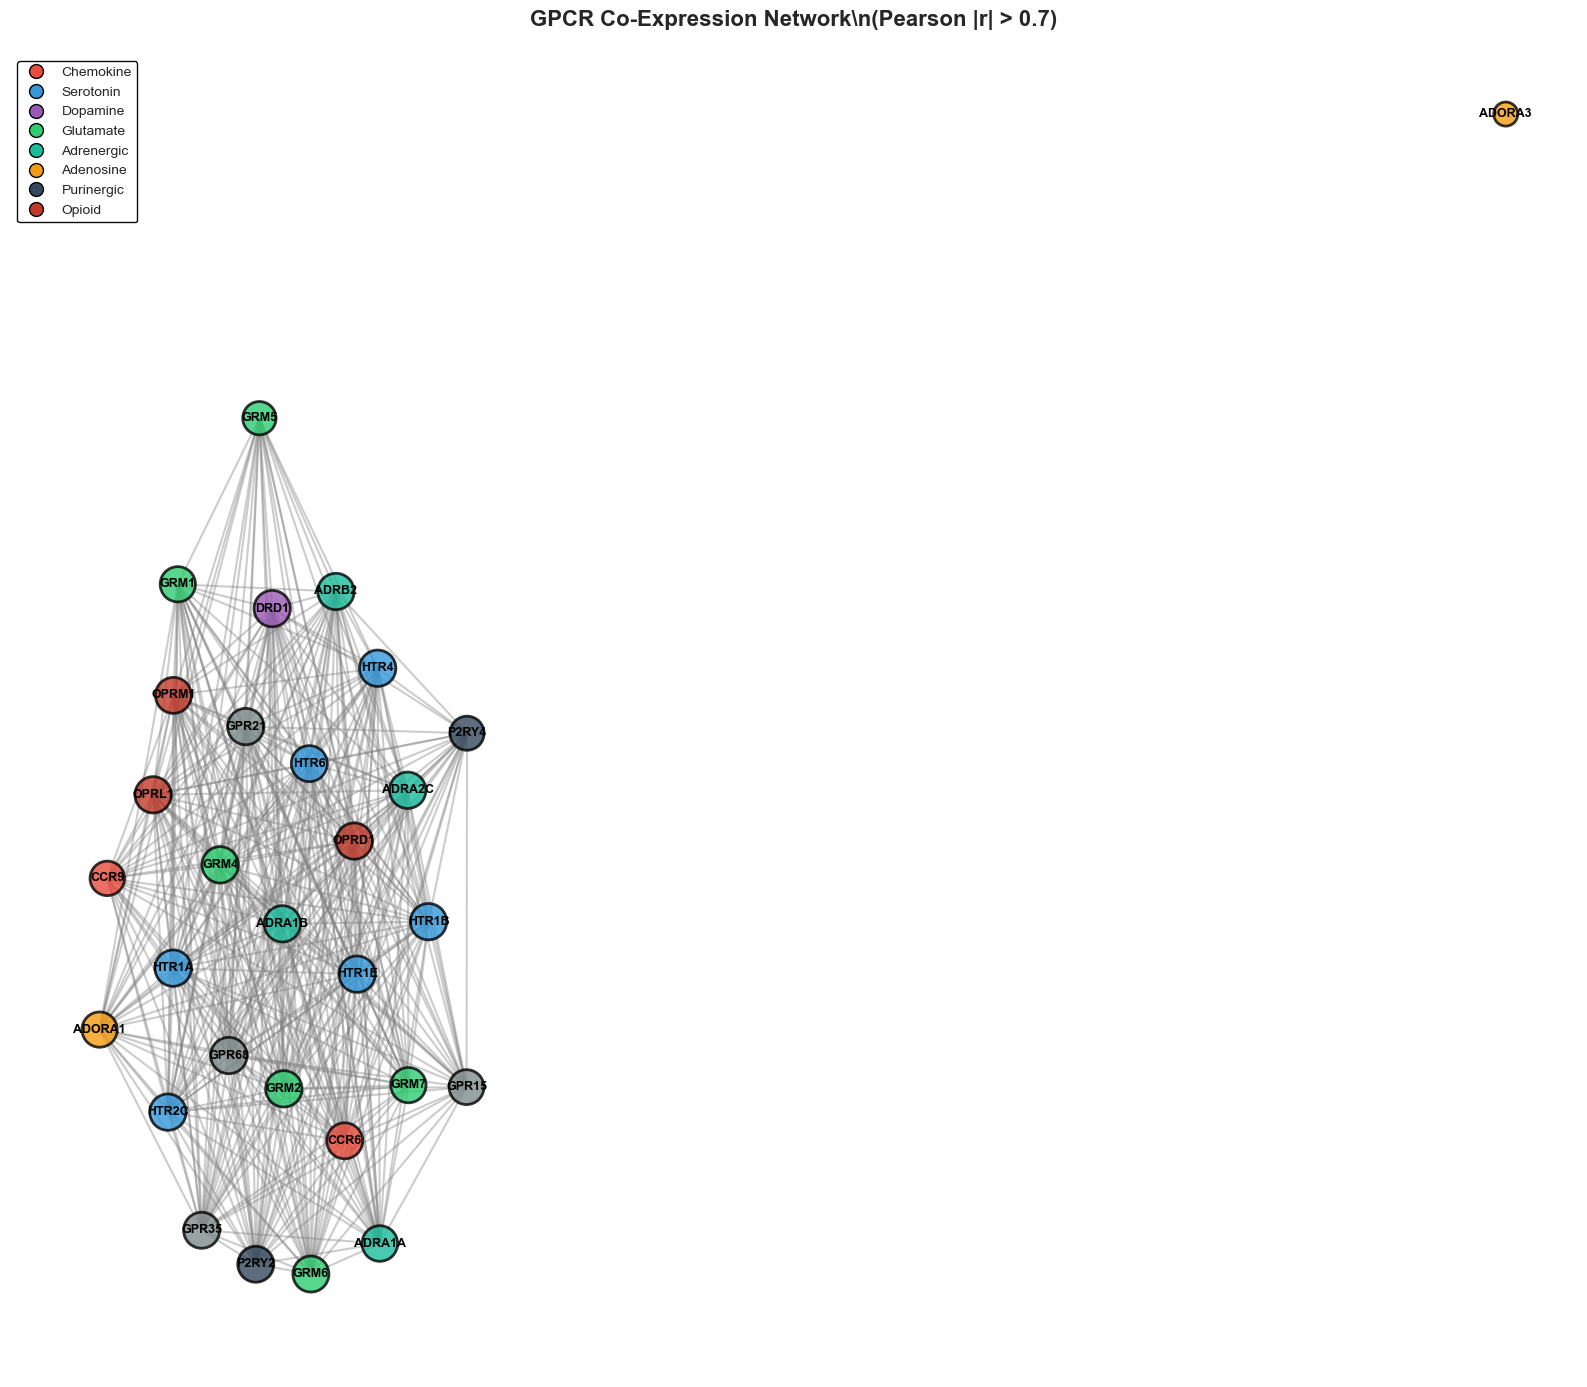

✓ Network visualization saved: 'Figure_GPCR_Network.png'

NETWORK INSIGHTS

The network has 2 separate modules:
  Module 1: 29 GPCRs - HTR1B, P2RY2, OPRL1, GRM4, ADORA1...

**Hub GPCRs (master regulators):**
  • OPRD1 (Opioid): 28 connections
    → Potential master regulator in opioid signaling
  • GPR21 (Orphan GPR): 28 connections
    → Potential master regulator in orphan gpr signaling
  • HTR4 (Serotonin): 28 connections
    → Potential master regulator in serotonin signaling

**Biological Interpretation:**
  • Hub GPCRs represent potential master regulators
  • Highly connected GPCRs may be better therapeutic targets
  • Modules suggest co-regulated receptor groups
  • Strong co-expression implies shared regulatory mechanisms


In [133]:
# ============================================================================
# NETWORK VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(16, 14))

# Color palette by family
family_colors = {
    'Chemokine': '#e74c3c',
    'Complement': '#e67e22',
    'Serotonin': '#3498db',
    'Dopamine': '#9b59b6',
    'Glutamate': '#2ecc71',
    'Adrenergic': '#1abc9c',
    'Adenosine': '#f39c12',
    'Purinergic': '#34495e',
    'Cannabinoid': '#16a085',
    'Opioid': '#c0392b',
    'Orphan': '#95a5a6',
    'Unknown': '#7f8c8d'
}

# Node colors
node_colors = [family_colors.get(G.nodes[node]['family'], '#7f8c8d') for node in G.nodes()]

# Node sizes based on degree centrality
node_sizes = [300 + 400 * degree_centrality[node] for node in G.nodes()]

# Layout
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                       node_color=node_colors,
                       node_size=node_sizes,
                       alpha=0.8,
                       linewidths=2,
                       edgecolors='black')

# Draw edges
nx.draw_networkx_edges(G, pos, 
                       width=1.5,
                       alpha=0.4,
                       edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, 
                        font_size=9,
                        font_weight='bold',
                        font_family='sans-serif')

plt.title('GPCR Co-Expression Network\\n(Pearson |r| > 0.7)', 
          fontsize=16, fontweight='bold', pad=20)

# Legend
legend_elements = []
for family, color in family_colors.items():
    if family in [G.nodes[n]['family'] for n in G.nodes()]:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                                         markerfacecolor=color, markersize=10, 
                                         label=family, markeredgecolor='black', markeredgewidth=1))

plt.legend(handles=legend_elements, loc='upper left', fontsize=10, 
          framealpha=0.95, edgecolor='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('Figure_GPCR_Network.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Network visualization saved: 'Figure_GPCR_Network.png'")

# Network insights
print("\n" + "="*70)
print("NETWORK INSIGHTS")
print("="*70)

# Connected components
if nx.is_connected(G):
    print("\nThe network is fully connected")
else:
    components = list(nx.connected_components(G))
    print(f"\nThe network has {len(components)} separate modules:")
    for i, comp in enumerate(components, 1):
        if len(comp) > 1:
            comp_list = list(comp)[:5]
            print(f"  Module {i}: {len(comp)} GPCRs - {', '.join(comp_list)}{'...' if len(comp) > 5 else ''}")

# Hub interpretation
print("\n**Hub GPCRs (master regulators):**")
for gpcr, centrality in hub_gpcrs[:3]:
    family = G.nodes[gpcr]['family']
    degree = G.degree(gpcr)
    print(f"  • {gpcr} ({family}): {degree} connections")
    print(f"    → Potential master regulator in {family.lower()} signaling")

print("\n**Biological Interpretation:**")
print("  • Hub GPCRs represent potential master regulators")
print("  • Highly connected GPCRs may be better therapeutic targets")
print("  • Modules suggest co-regulated receptor groups")
print("  • Strong co-expression implies shared regulatory mechanisms")